# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - установить параметры недвижимости из имеющихся данных для дальнейшего использования их в модели машинного обучения, которая будет определять цену квартиры. 

**Параметры недвижимости** - показатели, необходимые для анализа в зависимости от их значения и цены квартиры:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира;
* даты размещения.

**Ход исследования**

1. Предварительный обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Общий вывод.

# Описание данных
* **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
* **balcony** — число балконов
* **ceiling_height** — высота потолков (м)
* **cityCenters_nearest** — расстояние до центра города (м)
* **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
* **first_day_exposition** — дата публикации
* **floor** — этаж
* **floors_total** — всего этажей в доме
* **is_apartment** — апартаменты (булев тип)
* **kitchen_area** — площадь кухни в квадратных метрах (м²)
* **last_price** — цена на момент снятия с публикации
* **living_area** — жилая площадь в квадратных метрах (м²)
* **locality_name** — название населённого пункта
* **open_plan** — свободная планировка (булев тип)
* **parks_around3000** — число парков в радиусе 3 км
* **parks_nearest** — расстояние до ближайшего парка (м)
* **ponds_around3000** — число водоёмов в радиусе 3 км
* **ponds_nearest** — расстояние до ближайшего водоёма (м)
* **rooms** — число комнат
* **studio** — квартира-студия (булев тип)
* **total_area** — общая площадь квартиры в квадратных метрах (м²)
* **total_images** — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
except:
    data = pd.read_csv('/yandex/practicum/datas/real_estate_data_03.csv',sep='\t')
    
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Каждая строка - объявление о продаже недвижимости. Есть колонки с отсутствующими значениями. Так же тип некоторых столбцов отличается от типа, который должен быть по описанию представленных данных. Посмотрим примерно с чем будем иметь дело. 

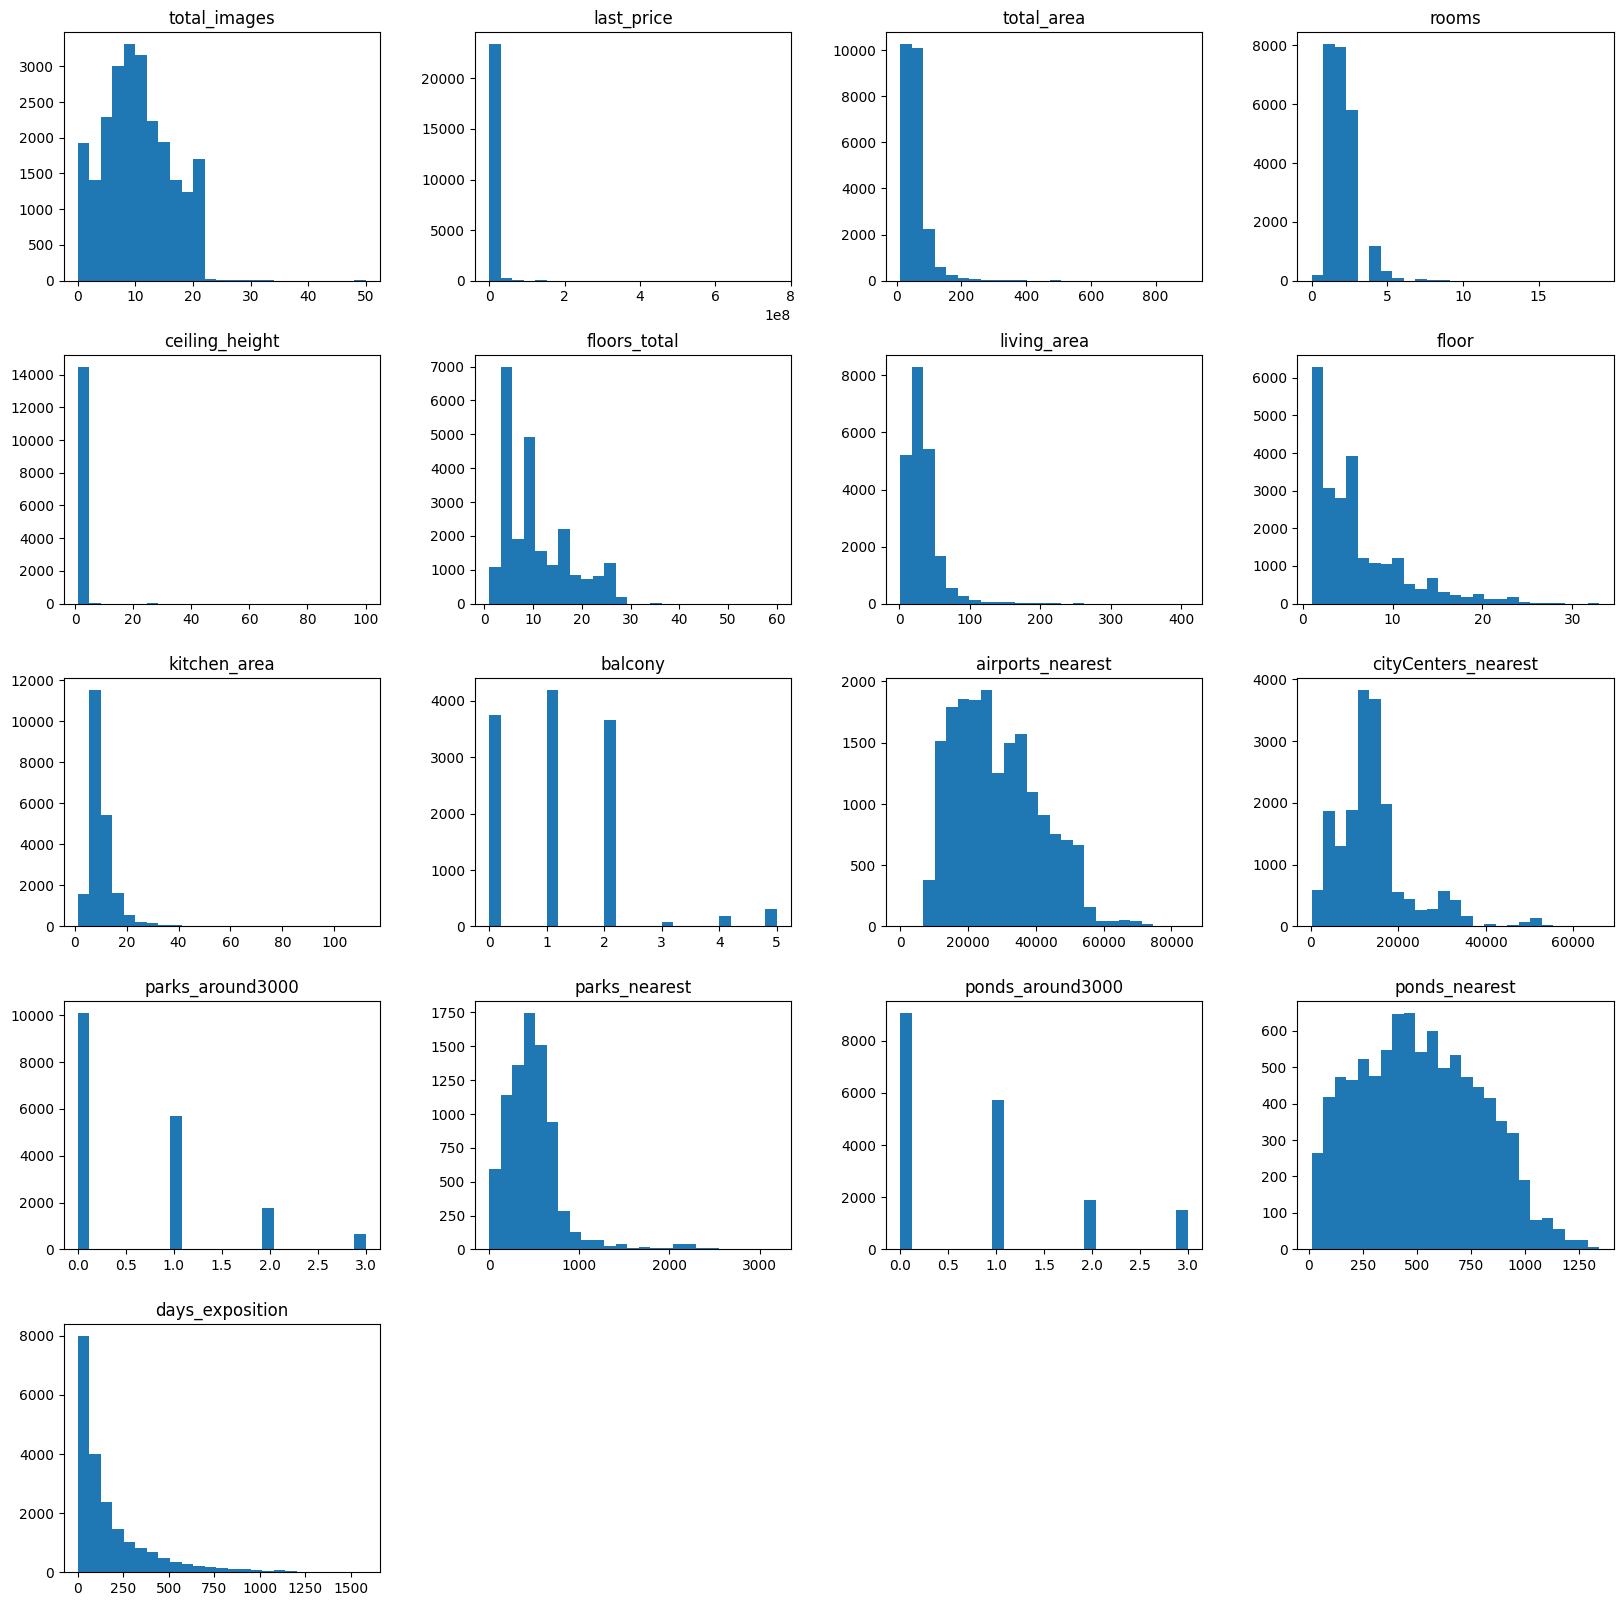

In [4]:
data.hist(bins=25, figsize=(20,20), grid=False);

Большое количество пропусков и аномальных значений не позволяют сделать каких-либо предварительных выводов. Сложнее всего решить проблему с картографическими данными, полученными автоматически. Тут либо ошибка ввода данных со стороны пользователей или же сбой в самой программе.

Начнем по порядку с обработки пропусков.

### Предобработка данных

#### Пропущенные значения

Определим количество пропущенных значений и их процент от общего количества данных в каждой из колонок.

In [5]:
# создадим таблицу с информацией о пропущенных значений
# в дальнейшем используем для построения гистрограмм
data_na = data.isna().sum().sort_values(ascending=False)/len(data) *100
data_na

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

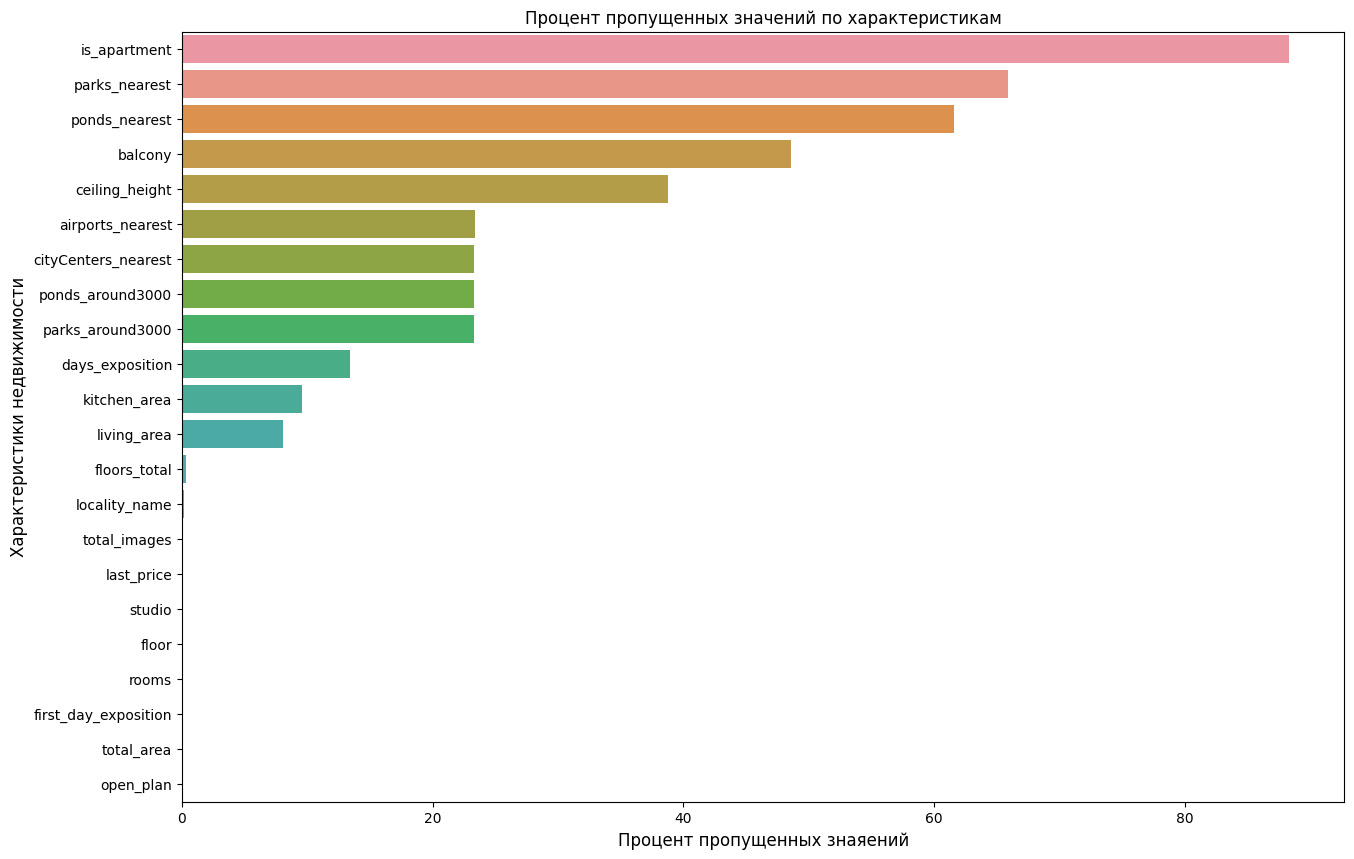

In [6]:
fig, axs = plt.subplots(figsize=(15, 10))
sns.barplot(y=data_na.index, x=data_na)

plt.ylabel('Характеристики недвижимости', fontsize=12);
plt.xlabel('Процент пропущенных знаяений', fontsize=12);
plt.title('Процент пропущенных значений по характеристикам', fontsize=12);
#axs.text(data_na)
#.add(data_na.Text(color="w", halign="right")

Теперь есть представление с каких данных начать обработку. Сразу же избавимся от пропущенных значений в **floors_total, locality_name** удалив их. В сумме потеряем 0.5% от общего количества данных, что ничтожно мало. Так же значения столбцов **kitchen_area** и **living_area** можно примерно вычислить, учитывая, что общая площадь всех объявлений известна.

In [7]:
# удалим и проверим, полученный датафрейм
data = data.dropna(subset=['locality_name','floors_total']) 
print(data.shape)
data[['locality_name','floors_total']].isna().sum()

(23565, 22)


locality_name    0
floors_total     0
dtype: int64

##### is_apartment

В этой характеристике самое большое количество пропусков (более 80%), и определяет является ли недвижимость апартаментом или нет. 

Сначала посмотрим на заполненные значения, возможно, что пустые значения означают, что в объявлении не апартаменты.

In [8]:
# считаем количество апартаментов и не апартаментов, игнорируя пропущенные значения
apartment = data[data['is_apartment'] == True].count()
not_apartment = data[data['is_apartment'] == False].count()

print('Количество апартаментов:', apartment['is_apartment'])
print('Количество не апартаментов:', not_apartment['is_apartment']) 

Количество апартаментов: 50
Количество не апартаментов: 2710


В таблице есть значения **True** и **False**, причем апартаментов только 50. Это выглядит странно. Скорее всего некоторые владельцы умышленно скрывают статус недвижимости (апартаменты дешевле квартир в жилых зданиях), а другие, возможно, уже указали в описании квартиры ее статус и поленились заполнить еще раз в отдельном месте. 

Как заполнить пропуски?

Понять является ли недвижимость апартаментами без документаций здания, в котором оно продается, невозможно. Если считать, что пропущенные значения означают, что недвижимость не является апартаментами, то за несколько лет было продано только 50 апартаментов. Такая цифра выглядит нереалистичной.

В итоге получаем характеристику с 80% пропусков, которые нельзя адекватно заполнить по имеющимся данными, поэтому было принято решение отказаться полностью от этой характеристики. 

In [9]:
# удалим весь столбец с ненужными данными и проверим полученный датафрейм
data = data.drop('is_apartment', axis=1)
data.shape

(23565, 21)

##### parks_nearest и ponds_nearest

Далее две характеристики, заполненные автоматически на основе картографических данных. В каждом по 60% пропущенных значений. Посмотрим на распределение значений.

In [10]:
data[['parks_nearest','ponds_nearest']].describe().T

,count,mean,std,min,25%,50%,75%,max
parks_nearest,8030.0,490.580448,341.572956,1.0,288.0,455.0,612.0,3190.0
ponds_nearest,9036.0,518.289509,278.009558,13.0,293.0,503.0,730.0,1344.0


Есть выбросы и аномальные значения (1 м. до ближайшего парка). Заполнение пропущенных значений общей медианной испортит распределение, так как больше половины данных станут равным медианному значению. Попробуем заменить пропуски в зависимости от расположения населенного пункта

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.00,9.00,14.0,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.0,3400000.00,4646000.00,6790000.0,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.00,52.00,69.7,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14481.0,2.771283e+00,1.261983e+00,1.0,2.51,2.65,2.8,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.00,9.00,16.0,60.0
living_area,21700.0,3.445482e+01,2.204536e+01,2.0,18.60,30.00,42.3,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21343.0,1.056099e+01,5.900630e+00,1.3,7.00,9.10,12.0,112.0
balcony,12090.0,1.157155e+00,1.070877e+00,0.0,0.00,1.00,2.0,5.0


In [12]:
# создадим новый датафрейм и посмотрим как поведет себя распределение после заполнения пропусков
park_data = data.copy() 
# заполним пропущенные значения медианой каждого населенного пункта
park_data['parks_nearest'] = (
    park_data['parks_nearest']
    .fillna(data.groupby('locality_name')['parks_nearest']
    .transform('median'))
)

park_data['parks_nearest'].describe()

count    17579.000000
mean       475.895244
std        234.981831
min          1.000000
25%        433.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

Пропущенные значения  заполнились, но не все и слишком сильно искажают распределение. Такие данные нельзя оставлять. 

Возможно, что не определяются расстояния до парков в каких-то определенных населенных пунктах. Если это так, то или нет парков по близости или есть ошибка в автоматическом сборе данных. Посмотрим какие объявления содержат пропущенные значения.

In [13]:
park_data[park_data[['parks_nearest']].isna().any(axis=1)].head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,False,...,11.60,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,NaN,4.0,42.50,3,False,...,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
57,7,3200000.0,45.00,2017-10-25T00:00:00,1,NaN,25.0,17.00,10,False,...,12.00,NaN,посёлок Шушары,13097.0,18883.0,0.0,NaN,1.0,649.0,173.0


В большинстве случаев отсутствуют все картографические данные. Возможная причина - орфографические ошибки в названии населенного пункта, введенного пользователем или несоответствие названия населенного пункта с картографическими данными. Так же возможен сбой в работе программы.

Пока что эти данные не трогаем, попробуем в дальнейшем проанализировать на наличие неявных дубликатов в названиях населенных пунктов. Если они присутствуют, то привести к одному названию и надеяться, что в каком-то одном названии картографические данные присутствуют. Далее пропущенные значения заполнить по средним или медианным показателям каждого населенного пункта.



##### is_balcony

Количесто балконов - почти 50 % пропущенных значений. Многовероятно в объявлениях с недвижимостью без балконов не вписывали значение. Проверим это, заполнив нулями пропущенные значения.

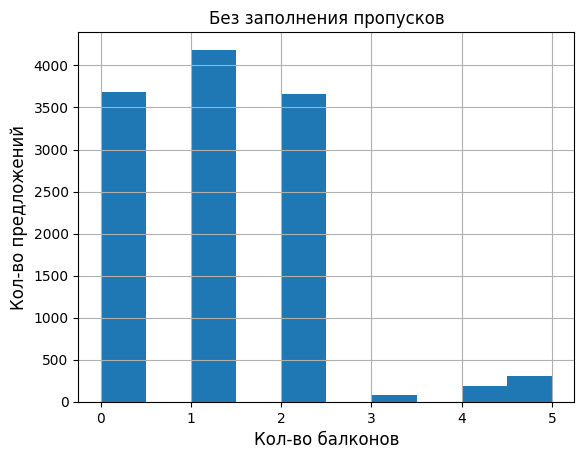

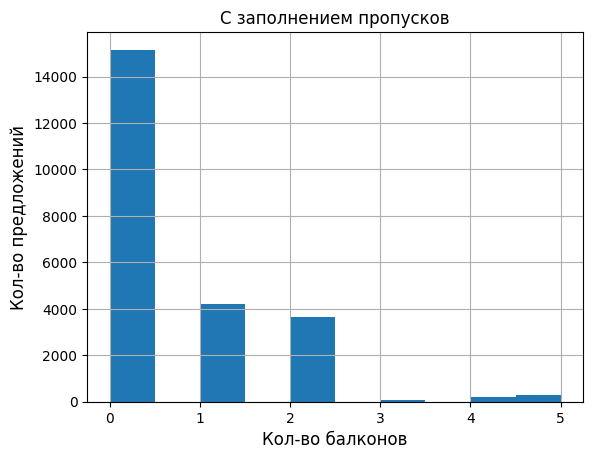

In [14]:
data['balcony'].hist();
plt.ylabel('Кол-во предложений', fontsize=12);
plt.xlabel('Кол-во балконов', fontsize=12);
plt.title('Без заполнения пропусков', fontsize=12);
plt.show()
data['balcony'].fillna(value=0).hist();
plt.ylabel('Кол-во предложений', fontsize=12);
plt.xlabel('Кол-во балконов', fontsize=12);
plt.title('С заполнением пропусков', fontsize=12);


После заполнения отсутствующих значений больше половины объявлений составляет недвижимость без балкона. Навряд ли такое возможно и этот параметр не важен для модели, поэтому было принято решение избавиться от этой характеристики.

In [15]:
data = data.drop('balcony', axis=1)
data.shape

(23565, 20)

##### ceiling_height

Высота потолков - почти 40% пропущенных значений.
Посмотрим на распределение.

In [16]:
print(data['ceiling_height'].describe())
data.query('locality_name == "Санкт-Петербург"').describe().T

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


,count,mean,std,min,25%,50%,75%,max
total_images,15651.0,1.020165e+01,5.746729e+00,0.0,6.00,10.0,14.00,50.0
last_price,15651.0,8.064895e+06,1.303626e+07,12190.0,4200000.00,5500000.0,8150000.00,763000000.0
total_area,15651.0,6.474634e+01,4.042674e+01,12.0,42.00,55.0,74.55,900.0
rooms,15651.0,2.172385e+00,1.148437e+00,0.0,1.00,2.0,3.00,19.0
ceiling_height,10096.0,2.803717e+00,1.297423e+00,1.0,2.55,2.7,2.87,100.0
floors_total,15651.0,1.139589e+01,6.372330e+00,1.0,5.00,9.0,16.00,52.0
living_area,14534.0,3.697659e+01,2.471906e+01,2.0,19.90,31.3,44.00,409.7
floor,15651.0,6.224011e+00,4.886328e+00,1.0,3.00,5.0,8.00,33.0
kitchen_area,14308.0,1.114858e+01,6.543601e+00,1.3,7.20,9.9,12.50,112.0
airports_nearest,15567.0,2.804028e+04,1.154900e+04,0.0,18575.50,26763.0,36587.00,54784.0


Есть аномальные значения, но значения медианы и квантилей выглядят правдоподобными. 

Высота потолков зависит от года постройки здания. Таких данных нет. Попробуем заполнить пропущенные значения, выполнив следующие шаги:

* сгруппируем данные по населенным пунктам и количеству этажей в домах; 
* определим медианное значение сгрупированных данных;
* в соответствии с этими данными заполним пропущенные значения.  

In [17]:
# создадим новую переменную и посмотрим как поведет себя распределение после заполнения пропусков
ceiling = data.copy()
ceiling['ceiling_height'] = (
    ceiling['ceiling_height']
    .fillna(ceiling.groupby(['locality_name', 'floors_total'])['ceiling_height']
    .transform('median'))
)
print('Количество пропущенных значений высоты потолков:', ceiling['ceiling_height'].isna().sum())
ceiling['ceiling_height'].describe()



Количество пропущенных значений высоты потолков: 392


count    23173.000000
mean         2.739359
std          1.017607
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Настораживает, что стандартное отклонение после заполнения пропущенных значений заметно уменьшилось. Это может означать, что метод заполнения искажает значения в данных. Проверим это визуально, построив гистограммы до заполнения и после.

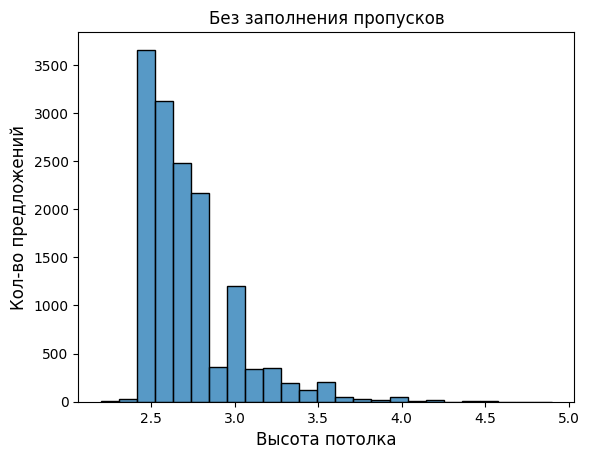

In [18]:
sns.histplot(data[(data['ceiling_height'] < 5) & (data['ceiling_height'] > 2)]['ceiling_height'], bins=25);
plt.ylabel('Кол-во предложений', fontsize=12);
plt.xlabel('Высота потолка', fontsize=12);
plt.title('Без заполнения пропусков', fontsize=12);


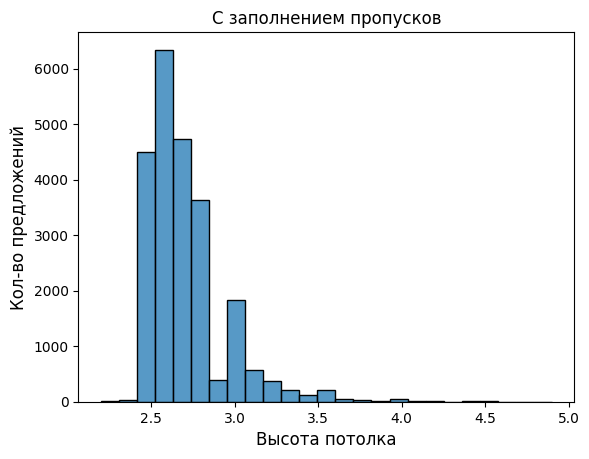

In [19]:
sns.histplot(ceiling[(ceiling['ceiling_height'] < 5) & (ceiling['ceiling_height'] > 2)]['ceiling_height'], bins=25);
plt.ylabel('Кол-во предложений', fontsize=12);
plt.xlabel('Высота потолка', fontsize=12);
plt.title('С заполнением пропусков', fontsize=12);

По гистограммам ясно, что заполнять пропуски по медиане каждой локации нельзя. Возможно влияние какого-то одного населенного пункта на такое распределение, посмотрим в каких городах больше всего пропущенных значений высоты потолков.

In [20]:
# сгруппируем по количеству пропущенных значений в колоне высоты потолков по каждому населенному пункту
data.ceiling_height.isnull().groupby(data['locality_name']).sum().sort_values(ascending=False).reset_index()

,locality_name,ceiling_height
0,Санкт-Петербург,5555
1,посёлок Мурино,320
2,посёлок Шушары,223
3,посёлок Парголово,190
4,деревня Кудрово,177
...,...,...
359,деревня Шпаньково,0
360,деревня Ялгино,0
361,коттеджный поселок Кивеннапа Север,0
362,коттеджный поселок Счастье,0


Только в одном Питере 60% пропущенных значений, и их заполнение по медиане вызывает такое искажение. Высота потолков зависит от года постройки здания и может варьироваться от 2.5 м. до 3.7 м. В исторических районах потолки квартир могут достигать до 4-ех метров, а в современных они варьируются от 2.6 м. до 3.2 м, поэтому, учитывая еще и большой разброс данных, каким-либо логичным способом заполнить пропущенные значения, не вызывая искажения датасета не представляется возможным. 

Эти пропуски мы не трогаем.

##### airports_nearest, cityCenters_nearest, ponds_around3000, parks_around3000

Далее четыре характеристики, заполненные автоматически . Первое, что бросается в глаза - это почти одинаковое количество пропущенных значений (по 23%). Посмотрим на распределение и разброс значений.

In [21]:
data[['airports_nearest','cityCenters_nearest', "ponds_around3000",'parks_around3000']].describe().T

,count,mean,std,min,25%,50%,75%,max
airports_nearest,18041.0,28797.082701,12632.499735,0.0,18565.0,26757.0,37273.0,84869.0
cityCenters_nearest,18064.0,14192.656056,8613.348153,181.0,9238.0,13096.5,16285.0,65968.0
ponds_around3000,18065.0,0.769499,0.938669,0.0,0.0,1.0,1.0,3.0
parks_around3000,18065.0,0.611569,0.802088,0.0,0.0,0.0,1.0,3.0


Данные 'ponds_around3000' и 'parks_around3000' обозначают количество прудов и парков в радиусе 3 километров от определенного здания. 
Логично предположить, что в таком радиусе нет прудов и парков, но в данных уже есть нулевые значения, тогда почему появились пропущенные значения непонятно. Нельзя удалить пропущенные значения, так как это 20% от общего количества данных.

Предполагаю, что ближайший аэропорт и центр города превышает границу какого-то значения и ему присвается значение 0. Проверим это, сгруппировав таблицу по названию локации и расстоянием до ближайшего аэропорта и центра города.

In [22]:
data.groupby('locality_name')[['airports_nearest',
                               'cityCenters_nearest',
                               "ponds_around3000",
                               'parks_around3000']]\
.count()

,airports_nearest,cityCenters_nearest,ponds_around3000,parks_around3000
locality_name,,,,
Бокситогорск,0,0,0,0
Волосово,0,0,0,0
Волхов,0,0,0,0
Всеволожск,0,0,0,0
Выборг,0,0,0,0
...,...,...,...,...
село Путилово,0,0,0,0
село Рождествено,0,0,0,0
село Русско-Высоцкое,0,0,0,0


Проверив расположения населенных пунктов, оказалось, что расстояния до аэропорта и центра города превышают примерно 150 километров, поэтому таким локациям программа присваивала значение 0. Возможно, что пропущенные значения так же означают, что населенный пункт находится на большом расстоянии от аэропорта или центра города.

In [23]:
data.query('locality_name == "Коммунар"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,False,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
541,0,1990000.0,42.00,2016-05-27T00:00:00,2,NaN,3.0,27.0,2,False,False,5.5,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,36.0
1801,11,2750000.0,53.00,2017-01-09T00:00:00,2,2.55,5.0,30.0,4,False,False,8.3,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1947,11,1400000.0,24.00,2018-06-15T00:00:00,1,2.55,5.0,10.0,5,False,False,6.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2019,12,2400000.0,35.50,2018-10-30T00:00:00,1,2.60,5.0,17.2,1,False,False,8.8,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21968,6,2200000.0,32.75,2018-07-10T00:00:00,1,NaN,9.0,14.0,5,False,False,7.1,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,277.0
23008,8,2199000.0,39.00,2016-03-01T00:00:00,1,3.00,5.0,18.0,5,False,False,9.3,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,366.0
23098,8,3200000.0,71.40,2017-03-03T00:00:00,3,2.60,9.0,41.0,7,False,False,8.4,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23493,9,2580000.0,61.00,2017-09-11T00:00:00,4,2.60,5.0,45.0,2,False,False,5.5,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,182.0


Коммунары находятся в пределах 30 километров от ближайшего аэропорта, но все картографические данные, определяющиеся программой, пропущены. 

Здесь идентичная ситуация, что и с 'parks_nearest' и 'ponds_nearest'. Пока что эти данные не трогаем. Если не удастся в дальнейшем заполнить адекватными значениями, то анализировать эти параметры придется по срезам данных.

##### kitchen_area, living_area

В колонке общей площади недвижимости нет пропущенных значений. Жилая площадь - это комнаты, которые пригодны для проживания в них, и площадь кухни не входит в понятие жилой площади. Так как нам известна суммарная площадь всех объявлений можно найти среднее или медианное отношение площади кухни и площади жилой зоны к общей площади недвижимости. Далее заполнить пропущенные значения с помощью этого отношения.

Так же необходимо учитывать другие нежилые зоны кроме кухни (туалеты, ванные комнаты, прихожие и т.д.). Предположим, что они занимают 10% от общей площади квартиры.


In [24]:
data[['total_area', 'living_area','kitchen_area']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,23565.0,60.322824,35.657060,12.0,40.0,52.0,69.7,900.0
living_area,21700.0,34.454822,22.045359,2.0,18.6,30.0,42.3,409.7
kitchen_area,21343.0,10.560994,5.900630,1.3,7.0,9.1,12.0,112.0


Есть аномальные значения, но в целом данные пригодны для работы с ними. 

Вычислим отношение медиан.

In [25]:
# найдем отношения неизвестных площадей к общей площади
living_ratio = data['living_area'].median() / data['total_area'].median()
kitchen_ratio = data['kitchen_area'].median() / data['total_area'].median()

# заполним значения и посмотрим на распределение
living = data['living_area'].fillna(living_ratio * data['total_area'])
kitchen = data['kitchen_area'].fillna(kitchen_ratio * data['total_area'])
pd.concat([living, kitchen], axis=1).describe()

,living_area,kitchen_area
count,23565.000000,23565.000000
mean,34.621108,10.499499
std,22.399827,6.037444
min,2.000000,1.300000
25%,19.000000,7.000000
50%,30.000000,9.000000
75%,42.115385,12.000000
max,409.700000,112.000000


Распределение почти не изменилось и удалось заполнить все пропущенные значения.

Проверим появление аномалий после заполнения.



In [26]:
# создадим новый датасет с заполненными пропусками по площадям
area_filled = data.copy()

area_filled['living_area'] = living
area_filled['kitchen_area'] = kitchen

# проверим условие аномалий (сумма жилой площади и площади кухни не должна превышать 90% общей площади)
len(area_filled[area_filled['total_area']*0.9 <=  
                area_filled['living_area'] + 
                area_filled['kitchen_area']]
)

659

Более 30% заполненных пропусков оказались с аномальными значениями, поэтому такой метод применять нельзя. Учитывая, что пропусков по колонкам менее 10% заполнять их не станем, а в дальнейшем проанализируем зависимости по срезам данных.

##### days_exposition

Очень важный параметр для нашего исследования. Скорее всего, владельцы недвижимости после завершения сделки по продаже квартиры не отмечали день, когда это произошло. Возможно, стоит сравнить пропущенные значения с примерно такими же квартирами, предварительно сгруппировав по населенному пункту, но пропущено 13% данных. Заполнив значения можно испортить статистику и получить неверные выводы из-за особенностей характеристики. Из всего этого было принято решение не заполнять значения и работать с пропущенными значениями.

#### Изменение типа данных

Посмотрим еще раз на информацию датафрейма.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   studio                23565 non-null  bool   
 10  open_plan             23565 non-null  bool   
 11  kitchen_area          21343 non-null  float64
 12  locality_name         23565 non-null  object 
 13  airports_nearest      18041 non-null  float64
 14  cityCenters_nearest   18064 non-null  float64
 15  parks_around3000   

Характеристики, где появлялись пропуски, заполненные значением NaN, автоматически заменялись на тип переменных `float`, если это количественные переменные.

Посмотрим на значения в таблице и определим дальнейшие шаги.

In [28]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,25.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,11.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,8.3,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,NaN,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,41.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* `last_price`, `floors_total` приведем к целочисленным значениям (цена и сумарное количество этажей - целые числа);
* `ceiling_height`, `living_area`, `kitchen_area` уменьшим порядок значений до десятых (обычно указывают до десятых);
* `first_day_exposition` переведем в формат `datetime` (для дальнейшего анализа)
* оставшиеся колонки трогать не будем

In [29]:
to_int = ['last_price','floors_total'] # приводим к целым числам
to_float = ['ceiling_height','living_area','kitchen_area'] # уменьшаем порядок

data[to_int] = data[to_int].apply(lambda x: x.astype(int))
data[to_float] = data[to_float].apply(lambda x: x.round(1))
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d %H:%M:%S')

#проверяем изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   studio                23565 non-null  bool          
 10  open_plan             23565 non-null  bool          
 11  kitchen_area          21343 non-null  float64       
 12  locality_name         23565 non-null  object        
 13  airports_nearest

#### Дубликаты

Посчитаем сумму явных дубликатов в датафрейме.


In [30]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено, но могут быть неявные. Такие дубликаты находятся в колонках с типом данных `object`. В данном датафрейме только `locality_name` имеет текстовый тип.

Посмотрим на количество уникальных значений в этом столбце. Выведем список этих значений 

In [31]:
print(data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

364


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Выполним следующие шаги для обработки неявных дубликатов:
* приведем к нижнему регистру все названия;
* заменим букву `ё` в каждом слове на `е`;
* во всех названиях, состоящих их двух или более слов, оставим только последнее

In [32]:
# для начала приведем все названия населенных пунктов к нижнему регистру и заменим ё на е
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е', regex=True)

# создадим словарь из слов, которые нужно убрать
# вместо них появятся пробелы
replacement = {
    'городской поселок':'',
    'поселок городского типа': '',
    'коттеджный поселок': '',
    'поселок станции': '',
    'посёлок при железнодорожной станции': '',
    'поселок при железнодорожной станции': '',
    'деревня':'',
    'поселок':'',
    'садовое товарищество': '',
    'садоводческое некоммерческое товарищество': '',
    'село':''
}

# заменяем названия по словарю  и избавляемся от пробелов
# вычислим количество уникальных значений после редактирования
data['locality_name'] = data['locality_name'].replace(replacement, regex=True).str.replace(' ', '')
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].unique()



Количество уникальных значений: 305


array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красныйбор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новоедевяткино', 'металлострой',
       'лебяжье', 'сиверский', 'молодцово', 'кузьмоловский', 'новаяропша',
       'павловск', 'пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'куттузи', 'аннино', 'ефимовский',
       'плодовое', 'заклинье', 'торковичи', 'первомайское', 'красное',
       'понтонный', 'сясьстрой', 'старая', 'лесколово', 'новыйсвет',
       'сланцы', 'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновыйбор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',
       'александ

После обработки неявных дубликатов из `364` уникальных значений осталось `305`. 

Названия населеных пунктов типа `Красное Село` стали выглядеть как `красное`.

In [33]:
# check
data.locality_name.nunique()

305

Проверим наличие дубликатов по значениям нескольких параметров (столбцов).

In [34]:
data.duplicated(subset=['total_area',  
                        'rooms', 
                        'locality_name', 
                        'last_price', 
                        'floors_total',
                       'days_exposition']).sum()

33

Сложно себе представить, чтобы случайно могли совпасть столько параметров. Сравним их визуально.

In [35]:
data[data.duplicated(keep=False, subset=['total_area',  
                        'rooms', 
                        'locality_name', 
                        'last_price', 
                        'floors_total',
                       'days_exposition'])].sort_values(by='last_price').head(19)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17326,4,1846648,25.0,2018-03-21,1,NaN,23,NaN,7,False,False,NaN,санкт-петербург,22089.0,17417.0,0.0,NaN,1.0,136.0,45.0
21687,4,1846648,25.0,2018-03-22,1,NaN,23,NaN,3,False,False,NaN,санкт-петербург,22089.0,17417.0,0.0,NaN,1.0,136.0,45.0
18425,1,2533531,42.5,2016-09-08,1,2.6,18,20.0,10,False,False,NaN,никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
9661,1,2533531,42.5,2016-09-08,1,2.6,18,19.8,7,False,False,NaN,никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
15995,2,2900000,31.0,2017-04-25,1,NaN,5,18.0,2,False,False,6.0,санкт-петербург,42884.0,15387.0,2.0,304.0,0.0,NaN,84.0
3277,3,2900000,31.0,2017-05-04,1,NaN,5,16.0,2,False,False,7.0,санкт-петербург,25836.0,14549.0,1.0,558.0,1.0,1092.0,84.0
15611,0,3300000,33.0,2018-02-09,1,2.5,12,NaN,12,False,False,NaN,санкт-петербург,47948.0,16890.0,0.0,NaN,0.0,NaN,45.0
8668,12,3300000,45.2,2018-10-18,2,NaN,9,26.8,3,False,False,6.3,красное,NaN,NaN,NaN,NaN,NaN,NaN,132.0
4358,11,3300000,45.2,2018-10-18,2,2.6,9,26.8,3,False,False,6.3,красное,24723.0,28148.0,0.0,NaN,0.0,NaN,132.0
5257,4,3300000,33.0,2018-03-04,1,2.5,12,NaN,3,False,False,NaN,санкт-петербург,33278.0,12941.0,1.0,460.0,1.0,688.0,45.0


Очень похоже, что объявления являются копиями, поэтому оставим только одно объявление из дубликатов. 

Причем часто встречаются повторяющиеся объявления со сроком в 45 дней. Оказалось, что по правилам сайта Яндекс.Недвижимость, бесплатные объявления продажи квартиры со стоимостью менее 4.5 млн. рублей автоматически снимаются спустя 45 дней.

Некоторые предложения из дубликатов расположенны на разных этажах или отличаются площадью менее чем на 1 кв.м. Предполагаю, что собственники создавали бесплатные предложения с разных аккаунтов.

In [36]:
data = data.drop_duplicates( subset=['total_area',  
                        'rooms', 
                        'locality_name', 
                        'last_price', 
                        'floors_total',
                       'days_exposition'])


#### Обработка аномальных значений

Изучая общую информацию о данных в таблице, мы уже отмечали, что довольно часто встречаются выбросы. Понять как параметры влияют на цену квартиры с такими данными нельзя, поэтому избавимся от аномальных значений.

In [37]:
# для начала посмотрим на распределение всех характеристик
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23532.0,9.879653e+00,5.681738e+00,0.0,6.0,9.0,1.400000e+01,50.0
last_price,23532.0,6.541070e+06,1.091692e+07,12190.0,3400000.0,4646500.0,6.799000e+06,763000000.0
total_area,23532.0,6.033835e+01,3.567320e+01,12.0,40.0,52.0,6.974250e+01,900.0
rooms,23532.0,2.070925e+00,1.078938e+00,0.0,1.0,2.0,3.000000e+00,19.0
ceiling_height,14460.0,2.775602e+00,1.262714e+00,1.0,2.5,2.6,2.800000e+00,100.0
floors_total,23532.0,1.067746e+01,6.595806e+00,1.0,5.0,9.0,1.600000e+01,60.0
living_area,21675.0,3.446072e+01,2.205437e+01,2.0,18.6,30.0,4.230000e+01,409.7
floor,23532.0,5.879611e+00,4.873374e+00,1.0,2.0,4.0,8.000000e+00,33.0
kitchen_area,21319.0,1.056129e+01,5.898612e+00,1.3,7.0,9.1,1.200000e+01,112.0
airports_nearest,18013.0,2.879451e+04,1.263365e+04,0.0,18557.0,26755.0,3.727300e+04,84869.0


Выделим характеристики необходимые для обработки:

* `last_price` - цена за квартиру имеет неадекватные минимальные и максимальные значения, так же стандартное отклонение в 10 миллионов рублей кажется странным
* `total_area` - общая площадь квартиры 12 кв.м. и 900 кв.м. кажется неправдоподобным и аномальным;
* `ceiling_height` - высота потолка в 100 метров не вызывает доверия, так же как и высота в 1 метр;
* `floors_total` - самое высокое жилое здание в Санкт-Петербурге имеет 42 этажа, аномальное значение в 60 этажей.
* `living_area` - 25% данных до значения 7 кв.м. 
* `kitchen_area` - минимальное значение 1.3 кв.м. и максимальное значение в 112 кв.м. не похоже на правду 

Далее по очереди обработаем выделенные данные в зависимости от вида распределения.

##### last_price

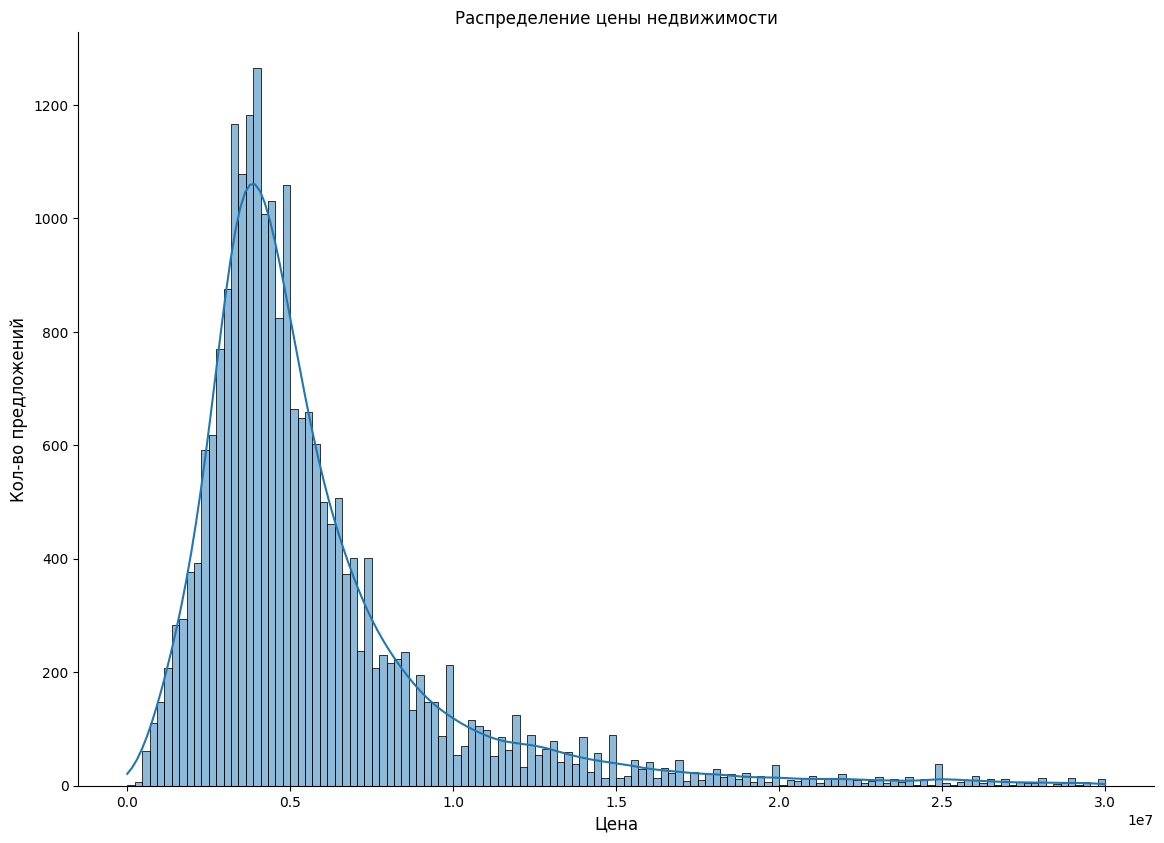

In [38]:
# посмотрим на распределение, ограничив максимальное значение цены квартиры
sns.displot(data[data['last_price'] < 30000000]['last_price'], kde=True, height=8.27, aspect = 11.7/8.27);
plt.ylabel('Кол-во предложений', fontsize=12);
plt.xlabel('Цена', fontsize=12);
plt.title('Распределение цены недвижимости', fontsize=12);

Распределение похоже на нормальное, понятно, что будут выбросы, вызывающие асимметричность распределения. Основная часть предложений находится в промежутке от 3 до 7 миллионов.

Определим границы аномальных значений с помощью диаграммы размаха и количество таких значений.

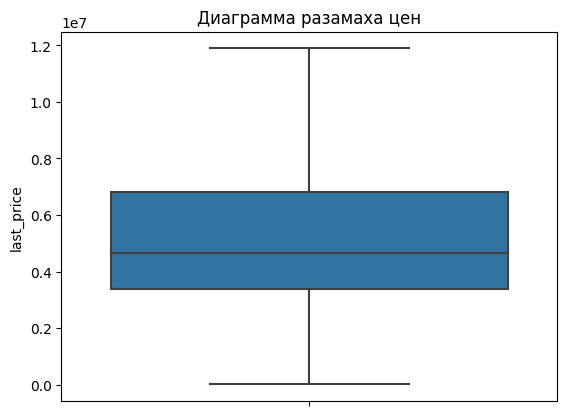

In [39]:
# построим диаграмму, исключая аномальные значения
sns.boxplot(y = data['last_price'], showfliers = False);

plt.title('Диаграмма разамаха цен', fontsize=12);

Видно, что аномальными считаются те значения, которые превышают 12 миллионов рублей или меньше 500 тыс. рублей. Такой разброс связан с видом распределения.

Посмотрим сколько объявлений выходят за границы диаграммы.

In [40]:
print('Количество квартир ценой менее 500 тыс.:', len(data.query('last_price < 500000')))
print('Количество квартир ценой более 12 млн.:', len(data.query('last_price > 12000000')))

Количество квартир ценой менее 500 тыс.: 14
Количество квартир ценой более 12 млн.: 1923


Почти 2000 объявлений с ценой более 12 млн. Значимый процент от общих данных, от корого избавляться нельзя. Поэтому увеличим границу, учитывая процент потери данных.

In [41]:
#создадим список границ цен и посчитаем процент от общих данных
list_price = [20000000, 30000000, 40000000, 50000000, 60000000]
for i in list_price:
    print((len(data[data['last_price'] > i])/len(data) * 100))

2.9874213836477987
1.3386027536970933
0.7691653918069012
0.556688764235934
0.42920278769335374


Квартиры стоимостью более 50 млн рублей составляют 0.5% от общих данных - от них и избавимся.

In [42]:
data = data.query('last_price <= 50000000 and last_price > 500000')
data.shape

(23383, 20)

In [43]:
data['last_price'].describe()

count    2.338300e+04
mean     5.999436e+06
std      4.973645e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      5.000000e+07
Name: last_price, dtype: float64

После изменений стандартное отклонение уменьшилось на порядок и составляет 5 млн. рублей (раньше 10 млн.).

##### total_area

count    23383.000000
mean        59.232881
std         31.070661
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        517.000000
Name: total_area, dtype: float64


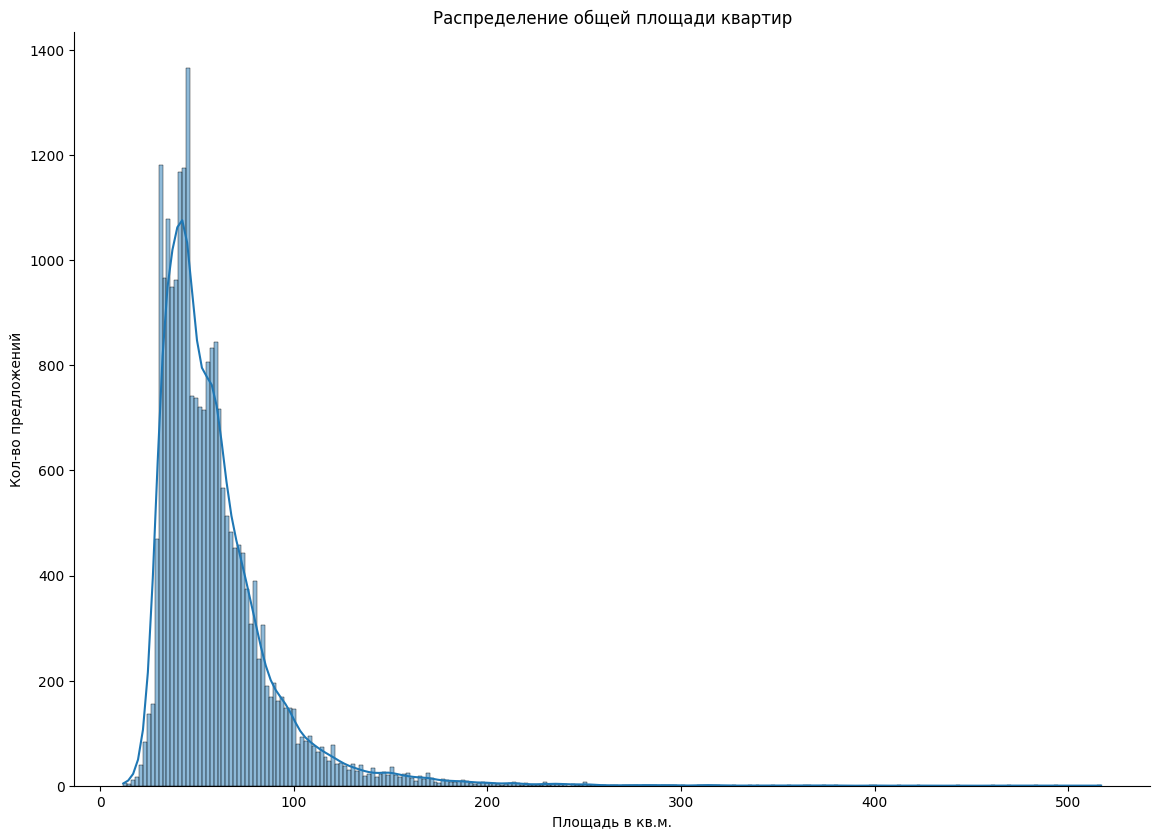

In [44]:
print(data['total_area'].describe())
(
sns.displot(data['total_area'], 
            kde=True, 
            height=8.27, 
            aspect = 11.7/8.27)
    .set(title='Распределение общей площади квартир', 
    xlabel='Площадь в кв.м.', 
    ylabel='Кол-во предложений')
);

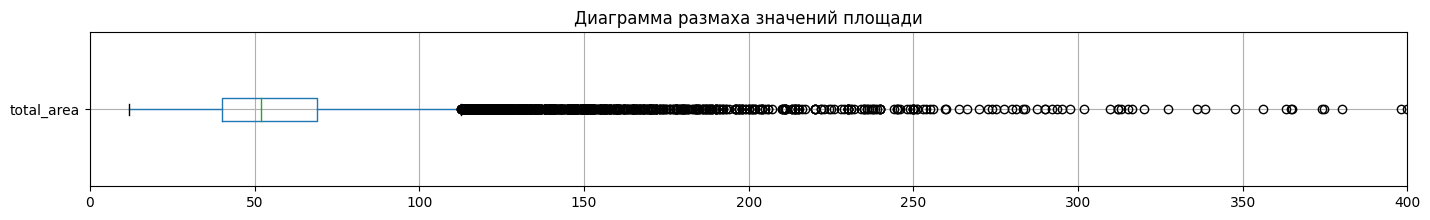

In [45]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

Избавимся от слишком больших значений.

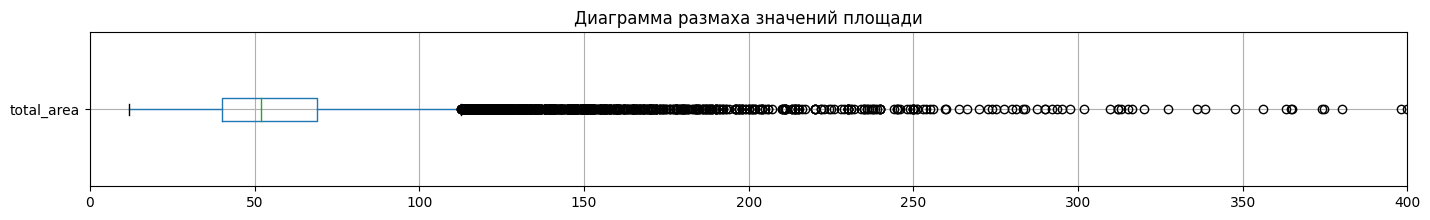

In [46]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

Как видно из диаграммы размаха, довольно большое количество предложений считается аномальным. При этом распределение ассиметричное и определять границы значений площади, которые нужно оставить по боксплоту ошибочно. 

Посмотрим на гистограмму распределения значений более 120 кв.м.

In [47]:
data.shape

(23383, 20)

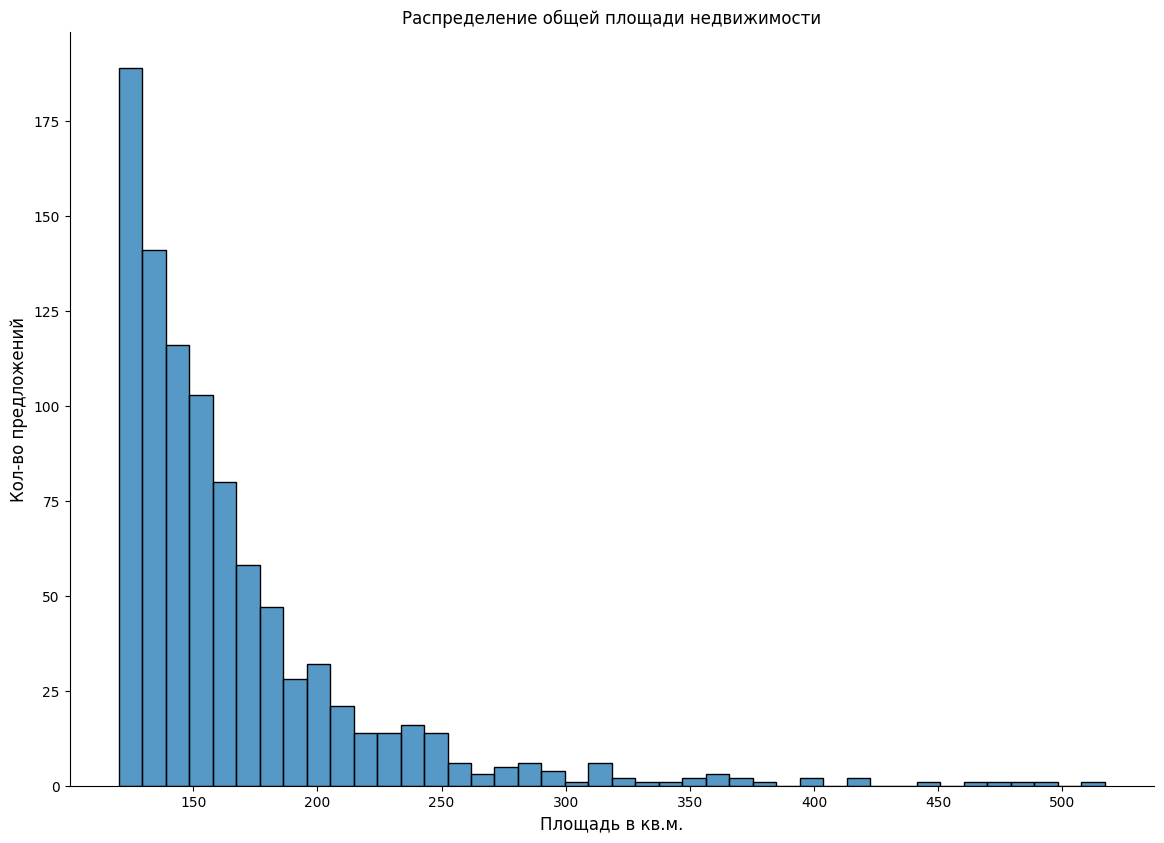

In [48]:
sns.displot(data[data['total_area'] > 120]['total_area'], height=8.27, aspect = 11.7/8.27);
plt.ylabel('Кол-во предложений', fontsize=12);
plt.xlabel('Площадь в кв.м.', fontsize=12);
plt.title('Распределение общей площади недвижимости', fontsize=12);

In [49]:
data.query('total_area > 170')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
121,20,33000000,180.0,2017-02-17,3,2.9,9,86.0,8,False,False,24.0,санкт-петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
147,10,27700000,179.6,2017-07-06,5,2.8,25,97.2,25,False,False,33.8,санкт-петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,75.0
417,5,14200000,178.0,2017-10-26,5,3.3,4,126.6,2,False,False,19.4,санкт-петербург,24287.0,2835.0,0.0,NaN,3.0,257.0,104.0
521,20,25717300,230.1,2015-01-21,3,NaN,3,130.0,1,False,False,26.1,пушкин,16877.0,29030.0,2.0,676.0,3.0,278.0,1441.0
616,18,15000000,187.3,2019-01-28,5,2.6,16,112.4,1,False,False,16.2,санкт-петербург,19891.0,21603.0,0.0,NaN,1.0,853.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,4,40000000,188.0,2017-05-29,6,NaN,6,109.5,4,False,False,31.3,санкт-петербург,23390.0,2254.0,2.0,425.0,1.0,62.0,30.0
23400,17,30000000,213.0,2017-09-28,7,3.4,5,151.4,5,False,False,30.8,санкт-петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0
23448,3,14700000,180.0,2018-02-08,6,3.0,6,126.0,5,False,False,20.0,санкт-петербург,23955.0,5089.0,0.0,NaN,2.0,616.0,NaN
23491,20,21800000,250.0,2017-09-16,3,NaN,12,104.0,7,False,False,45.0,санкт-петербург,43558.0,13138.0,0.0,NaN,0.0,NaN,49.0


Определим значения границы аномалий. В Питере встречаются 4-5-комнатные квартиры с общей площадью 150-250 кв.м. В дальнейшем такие квартиры можно объединить в одну категорию для обучения модели машинного обучения. Поэтому оставим квартиры до 250 кв.м. Квартиры с общей площадью менее 15 кв.м. отбросим как очень редкие.

count    23316.000000
mean        58.581792
std         27.912463
min         15.500000
25%         40.000000
50%         52.000000
75%         69.000000
max        249.900000
Name: total_area, dtype: float64
99.7134670487106


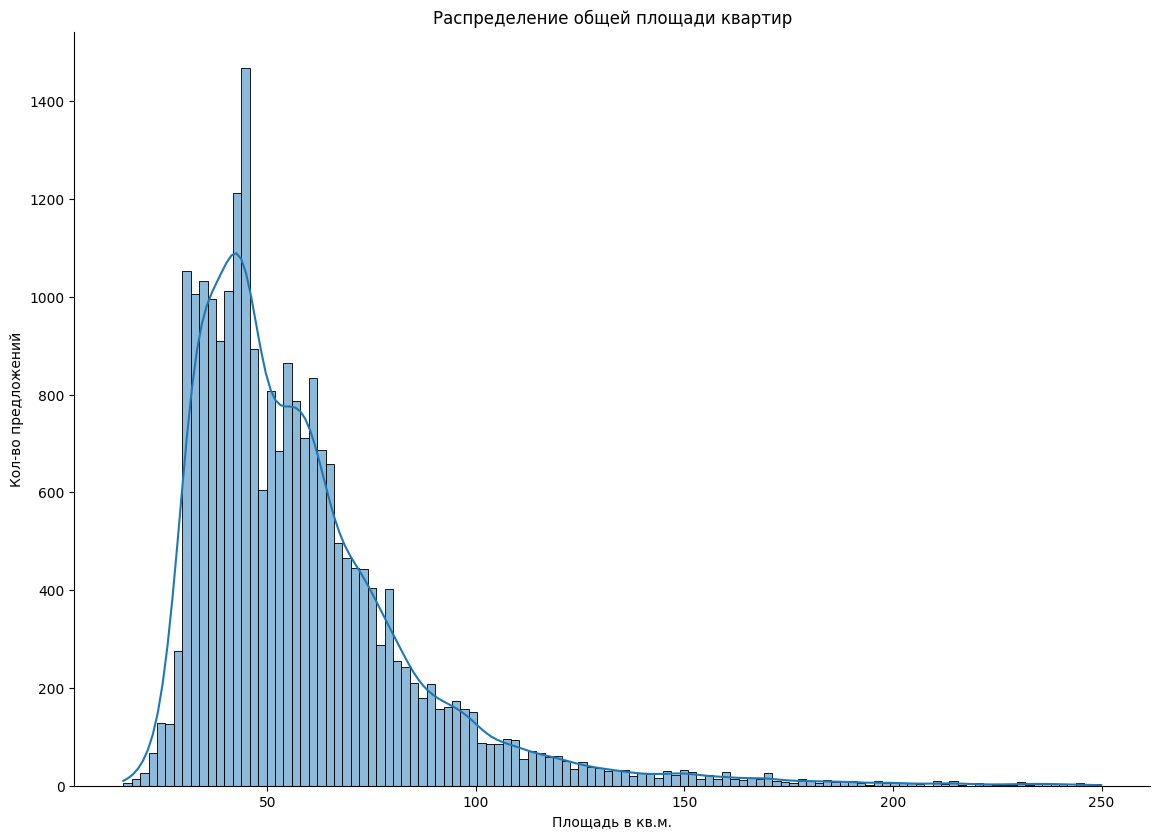

In [50]:
# квартиры, общая площадь которых превышает 250 кв.м., являются аномальными, поэтому от них избавимся
# квартиры, общая площадь которых ниже 15 кв.м., являются малочисленными и маловероятными, поэтому от них избавимся
area_border = [15, 250]

area_data = data.query('total_area < @area_border[1] and total_area > @area_border[0]')

print(area_data['total_area'].describe())
(
sns.displot(area_data['total_area'], 
            kde=True, 
            height=8.27, 
            aspect = 11.7/8.27)
    .set(title='Распределение общей площади квартир', 
    xlabel='Площадь в кв.м.', 
    ylabel='Кол-во предложений')
);
# проверим сколько данных потеряем, если выполнил эти изменения
print(area_data.shape[0]/data.shape[0]*100) 

После фильтрации потеряли 0.7% данных. Сохраним результат в основной таблице.

In [51]:
data = area_data

In [52]:
# от 0 до 112.5 кв.м.
print(data.shape[0])

IQR = data['total_area'].quantile(0.75) - data['total_area'].quantile(0.25)
(
data
    .loc[data['total_area']
         .between(data['total_area'].quantile(0.25) - 1.5 * IQR, 
                  data['total_area'].quantile(0.75) + 1.5 * IQR)]
)

23316


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.7,16,51.0,8,False,False,25.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,False,False,11.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,False,False,8.3,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000,100.00,2018-06-19,2,3.0,14,32.0,13,False,False,41.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.4,5,False,False,9.1,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.6,9,40.0,8,False,False,8.0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,False,False,8.5,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,False,NaN,рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.0,17,NaN,12,False,False,23.3,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


##### ceiling_height

In [53]:
data['ceiling_height'].describe()
data.shape

(23316, 20)

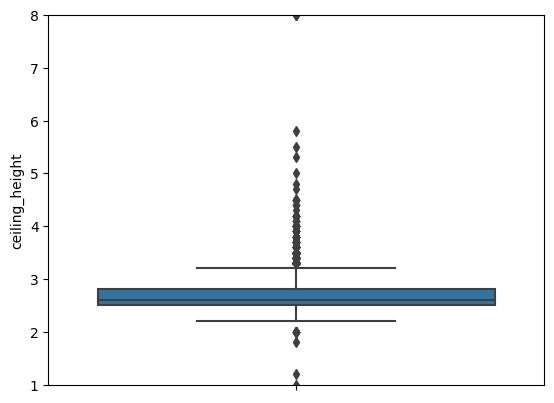

In [54]:
ax = sns.boxplot(y = data['ceiling_height']);
ax.set(ylim=(1,8));

Максимальная высота потолков, как правило, не регламентируется, но чаще всего она в современной застройке не превышает 3.2 метра. В старых домах с увеличенными габаритами и площадью, потолки могут быть 4 метра высотой и более. В доме сталинской постройки высота потолков  чаще всего колеблется в пределах 3.3-3.6 метра. Расстояние от пола до потолка в «хрущевках» составляет 2.5 метра, иногда встречаются квартиры с высотой до 2.7 метра. Современные многоквартирные дома имеют потолки высотой 2.7-3.2 метра и регламитируются сводом правил. В частных домах потолки могут быть любой высоты и их значения могут варьироваться.

Возможная причина появления высоких потолков - опечатки владельцев при вводе данных. Исходя из этого условия, разделим все высоты потолков со значением 25 - 40 метров  на 10. И посмотрим на получившееся распределение.

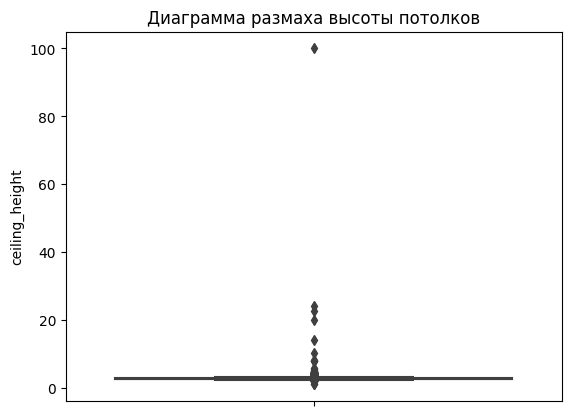

In [55]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x >= 25 and x <= 40 else x)
# избавимся от объявлений, где потолки ниже 2.4 метра и те, что превышают 3.5 метров, 

#data = data.query('ceiling_height < 3.5 and ceiling_height > 2.4')
sns.boxplot(y = data['ceiling_height']).set(title='Диаграмма размаха высоты потолков');

In [56]:
data = (data
        .drop(data[data['ceiling_height'] < 2.4].index)
        .drop(data[data['ceiling_height'] > 3.5].index)
        
       )

In [57]:
# потеряли примерно 2% данных
data.shape

(23059, 20)

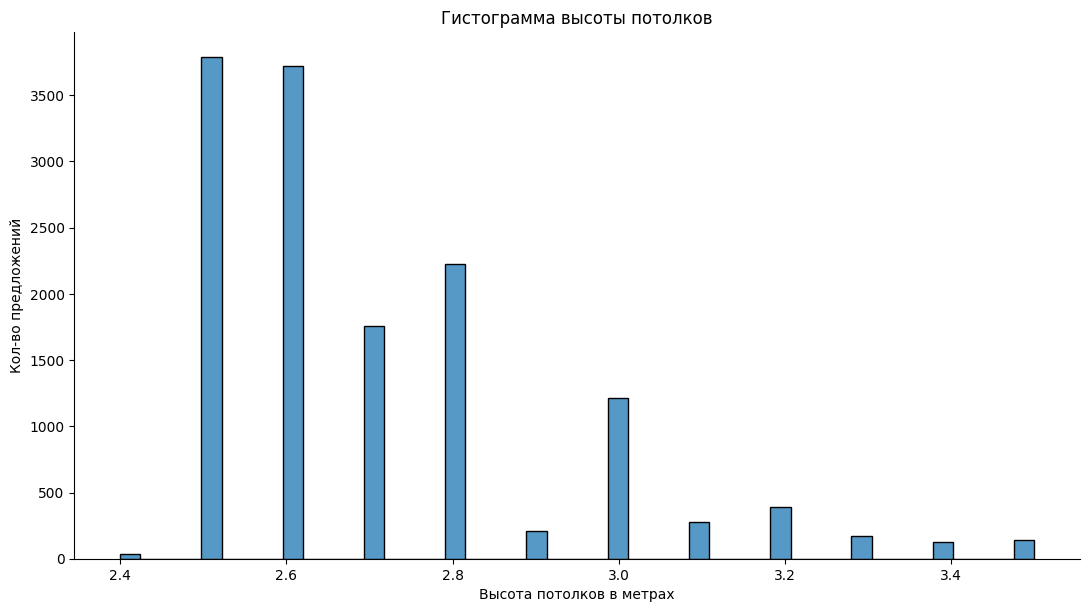

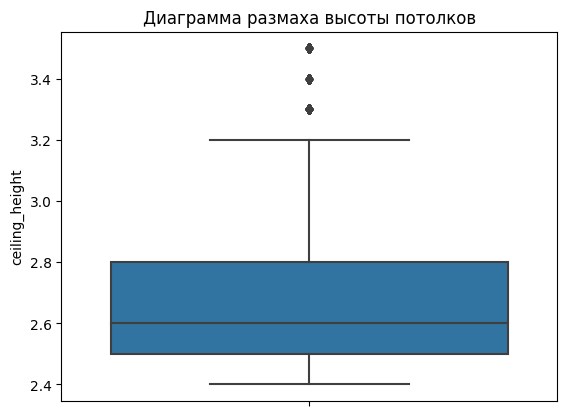

In [58]:

sns.displot(data['ceiling_height'], height = 6, aspect=11/6).set(title='Гистограмма высоты потолков', 
    xlabel='Высота потолков в метрах', 
    ylabel='Кол-во предложений');

plt.show()
sns.boxplot(y = data['ceiling_height']).set(title='Диаграмма размаха высоты потолков');

Больше всего значений с высотой равной 2.5 - 2.8 метров, примерно 10% объявлений с высотой равной 3 метра.

##### floors_total

Учитывая, что  самое высокое жилое здание в Санкт-Петербурге имеет 42 этажа, избавимся от тех значений, которые превышают это значение.

In [59]:
data['floors_total'].describe()

count    23059.000000
mean        10.769418
std          6.608283
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [60]:
data = data.query('floors_total <= 42')
data.shape

(23057, 20)

Таких оказалось только в двух объявлениях.

##### living_area

In [61]:
data['living_area'].describe()

count    21250.000000
mean        33.246113
std         17.903430
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        184.000000
Name: living_area, dtype: float64

In [62]:
# минимальная жилая площадь на одного человека по нормам составляет 6 кв.м, поэтому отбросим все, что ниже
data.query('living_area < 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000,41.0,2017-07-02,1,NaN,17,3.0,17,False,False,11.0,санкт-петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000,52.0,2018-02-06,2,3.0,6,2.0,2,False,False,9.0,санкт-петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17582,11,2680000,22.0,2018-08-11,0,NaN,25,5.0,8,True,False,NaN,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000,23.0,2018-01-01,0,NaN,24,2.0,22,True,False,NaN,мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21943,15,6100000,77.6,2019-02-28,4,2.5,9,5.4,1,False,False,9.8,санкт-петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0


In [63]:
# таких предложений 5, удалим их из таблицы
data = data.drop(data[data['living_area'] < 6].index)

##### kitchen_area

In [64]:
data['kitchen_area'].describe()

count    20896.000000
mean        10.340328
std          5.214446
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max         70.000000
Name: kitchen_area, dtype: float64

In [65]:
# по нормам минимальная площадь кухни составляет 5 кв.м.
data.query('kitchen_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,2800000,55.1,2016-05-14,3,2.6,5,38.4,1,False,False,4.9,кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0
298,9,2650000,42.8,2017-04-25,2,NaN,5,30.0,3,False,False,4.5,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,49.0
422,8,1700000,55.2,2018-03-24,3,2.5,5,38.5,5,False,False,4.5,кириши,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,15,2600000,27.0,2017-07-10,1,2.8,23,18.0,18,False,False,2.0,санкт-петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
1327,6,2650000,46.2,2016-12-01,2,2.5,5,29.2,5,False,False,4.9,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22675,9,2600000,42.4,2017-08-18,2,2.5,5,27.6,5,False,False,4.8,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,116.0
22839,14,3350000,27.0,2018-11-03,1,2.7,16,NaN,6,False,False,4.0,санкт-петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,35.0
22849,6,2380000,25.0,2016-03-22,1,NaN,25,19.0,15,False,False,4.0,шушары,13461.0,19247.0,0.0,NaN,1.0,351.0,140.0
23110,1,2900000,34.0,2018-02-01,2,2.9,2,20.0,1,False,False,4.0,стрельна,27006.0,23832.0,0.0,NaN,2.0,872.0,196.0


In [66]:
# таких предложений 372, удалим их из таблицы
data = data.drop(data[data['kitchen_area'] < 5].index)

##### общий вывод

In [67]:
data.shape

(22951, 20)

После фильтрации так же избавились от аномальных значений комнат (19). В первоначальном датафрейме было 23700 объявлений, а после обработки осталось 22882. Потеря данных в 3.5% (в пределах нормы).

#### check gap

In [68]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22951 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22951 non-null  int64         
 1   last_price            22951 non-null  int32         
 2   total_area            22951 non-null  float64       
 3   first_day_exposition  22951 non-null  datetime64[ns]
 4   rooms                 22951 non-null  int64         
 5   ceiling_height        14002 non-null  float64       
 6   floors_total          22951 non-null  int32         
 7   living_area           21145 non-null  float64       
 8   floor                 22951 non-null  int64         
 9   studio                22951 non-null  bool          
 10  open_plan             22951 non-null  bool          
 11  kitchen_area          20795 non-null  float64       
 12  locality_name         22951 non-null  object        
 13  airports_nearest

In [69]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,951.00","22,951.00","14,002.00","19,905.00","22,951.00","21,145.00","20,795.00","22,951.00","22,951.00"
min,0.00,15.50,2.40,1.00,"520,000.00",6.00,5.00,1.00,1.00
max,14.00,249.90,3.50,"1,580.00","50,000,000.00",184.00,70.00,33.00,36.00
median,2.00,51.66,2.60,95.00,"4,600,000.00",30.00,9.00,4.00,9.00


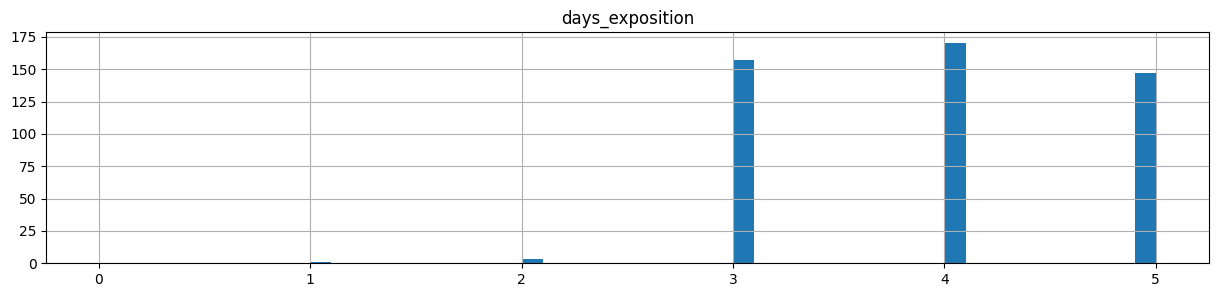

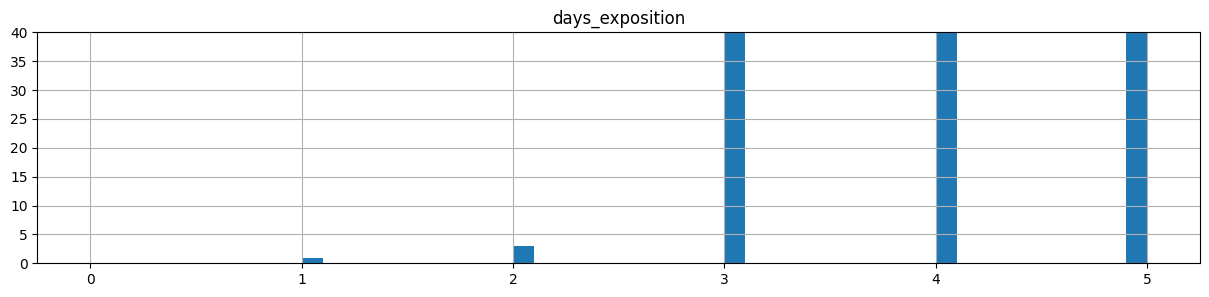

In [70]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

В сырых данных было 23700 объявлений, после предобработки осталось 22951 (97%). Потеря в 3%, что является хорошим результатом.

In [71]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

# я так понял нельзя .describe() по выбранным столбцам использовать

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,951.00","22,951.00","14,002.00","19,905.00","22,951.00","21,145.00","20,795.00","22,951.00","22,951.00"
min,0.00,15.50,2.40,1.00,"520,000.00",6.00,5.00,1.00,1.00
max,14.00,249.90,3.50,"1,580.00","50,000,000.00",184.00,70.00,33.00,36.00
median,2.00,51.66,2.60,95.00,"4,600,000.00",30.00,9.00,4.00,9.00


In [72]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [73]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


In [74]:
data.rooms.value_counts().to_frame()

,rooms
1,7883
2,7762
3,5645
4,1099
5,257
0,190
6,70
7,33
8,6
9,2


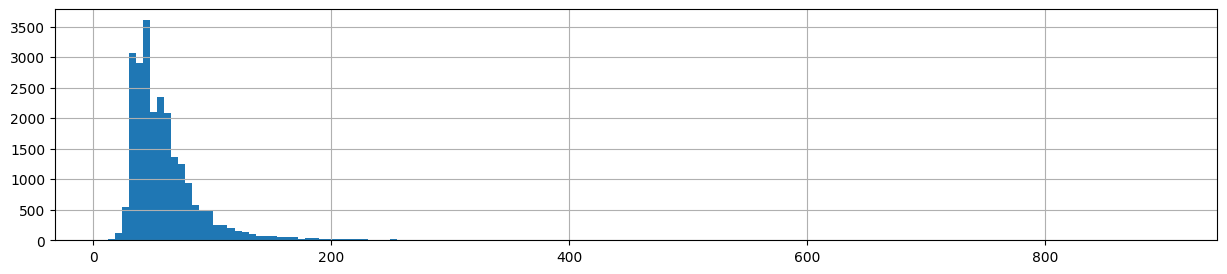

In [75]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

т.е. все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями

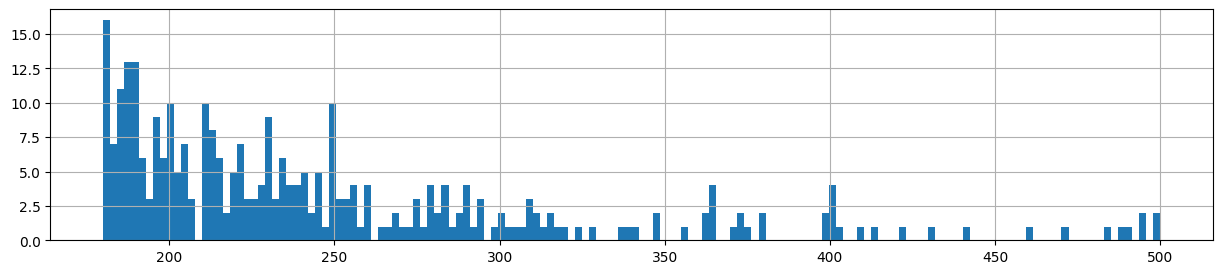

In [76]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

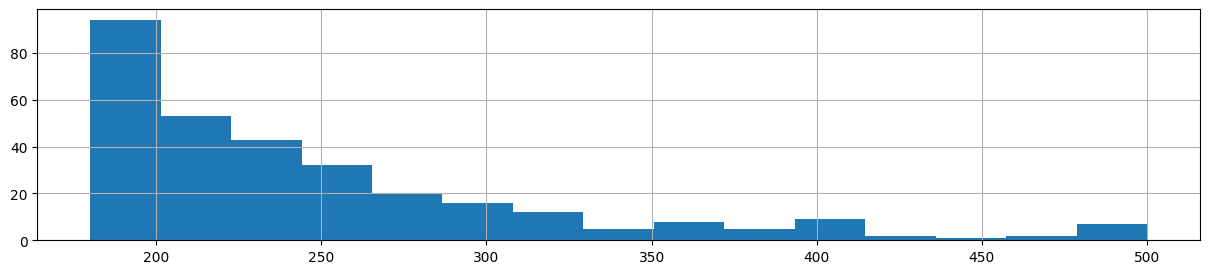

In [77]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

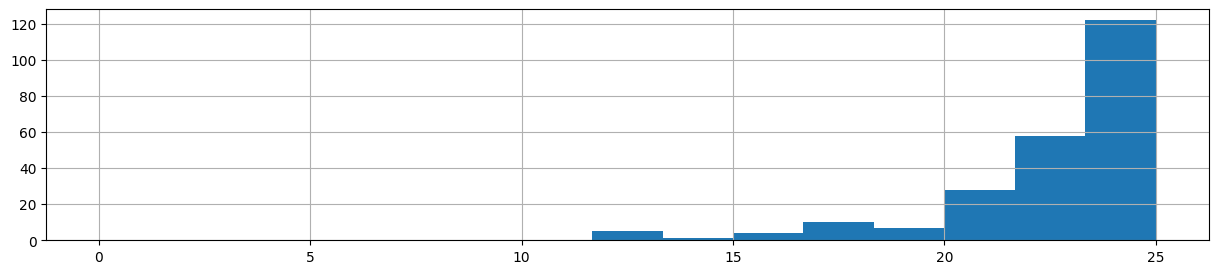

In [78]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [79]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.67,2.40,3.00,"630,000.00",10.00,5.00,1.00,2.00
0.01,1.00,26.00,2.50,4.00,"1,050,000.00",13.00,5.00,1.00,2.00
0.5,2.00,51.66,2.60,95.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.99,5.00,165.00,3.50,"1,063.88","26,305,000.00",99.50,32.31,23.00,26.00
0.9988,7.00,224.62,3.50,"1,373.23","44,176,000.00",151.85,50.00,26.00,33.46


Столбец `days_exposition` показывает, как быстро продавались квартиры. Значения  в 1 и 2 дня аномальные, так как встречаются всего 4 таких объявления. Природу таких аномалий установить сложно.

Проверим количество данных в отфильтрованном датасете.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22951 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22951 non-null  int64         
 1   last_price            22951 non-null  int32         
 2   total_area            22951 non-null  float64       
 3   first_day_exposition  22951 non-null  datetime64[ns]
 4   rooms                 22951 non-null  int64         
 5   ceiling_height        14002 non-null  float64       
 6   floors_total          22951 non-null  int32         
 7   living_area           21145 non-null  float64       
 8   floor                 22951 non-null  int64         
 9   studio                22951 non-null  bool          
 10  open_plan             22951 non-null  bool          
 11  kitchen_area          20795 non-null  float64       
 12  locality_name         22951 non-null  object        
 13  airports_nearest

Первоначально имели 23700 объявлений. После предобработки 22951. Почти 97% данных удалось сохранить.

### Посчитайте и добавьте в таблицу новые столбцы

Для определения и исследования зависимостей между различными параметрами недвижимости и ценой ее продажи необходимо добавить новые столбцы в датафрейм, а именно:

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (в км ).

#### цена одного квадратного метра

In [81]:
# разделим цену продажи недвижимости на ее общую площадь
data['price_per_sqrm'] = data['last_price']//data['total_area']
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqrm
0,20,13000000,108.00,2019-03-07,3,2.7,16,51.0,8,False,...,25.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.0
4,2,10000000,100.00,2018-06-19,2,3.0,14,32.0,13,False,...,41.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.4,5,False,...,9.1,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.6,9,40.0,8,False,...,8.0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.0
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,8.5,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,...,NaN,рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.0
23697,13,11475000,76.75,2017-03-28,2,3.0,17,NaN,12,False,...,23.3,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.0


#### день недели публикации объявления

In [82]:
# для этого есть встроенная функция, которая возвращает день недели : 0 - понедельник, 6 - воскресенье
# колонку, по которой обрабатывается день недели, ранее перевели в формат DateTime
data['weekday_expo'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqrm,weekday_expo
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.0,1
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.0,3
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.0,0


#### месяц публикации объявления

In [83]:
# аналогично запишем месяцы
data['month_expo'] = pd.DatetimeIndex(data['first_day_exposition']).month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqrm,weekday_expo,month_expo
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.0,1,12
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.0,3,8
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.0,0,9


#### год публикации объявления

In [84]:
data['year_expo'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqrm,weekday_expo,month_expo,year_expo
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.0,3,8,2015
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.0,0,9,2018


#### тип этажа квартиры

In [86]:
# напишем функцию категоризации этажей
def cat_floors(x):
    if x['floor'] == 1:
        return 'первый'
    elif x['floor'] == x['floors_total']:
        return 'последний'
    return 'другой'
    


In [87]:
# применим функцию к столбцу
data['floor_type'] = data.apply(cat_floors, axis=1)

In [88]:
# проверим значения
data.groupby('floor_type')['floor_type'].count().to_frame()

,floor_type
floor_type,
другой,16944
первый,2830
последний,3177


#### расстояние до центра города

In [89]:
# разделим имеющиеся непропущенные данные на 1000 и округлим до десятичных
data['citycenters_km'] = data['cityCenters_nearest']/1000 
data['citycenters_km'] = data['citycenters_km'].round(1)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqrm,weekday_expo,month_expo,year_expo,floor_type,citycenters_km
0,20,13000000,108.00,2019-03-07,3,2.7,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.0,1,12,2018,первый,18.6
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.0,3,8,2015,другой,13.9
4,2,10000000,100.00,2018-06-19,2,3.0,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.1
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.0,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.6,9,40.0,8,False,...,352.0,1.0,675.0,239.0,73717.0,4,8,2016,другой,34.1
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.0,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.0,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,3.0,17,NaN,12,False,...,173.0,3.0,196.0,602.0,149511.0,1,3,2017,другой,10.4


### Проведите исследовательский анализ данных

#### параметры объектов

Необходимо изучить и описать на основе гистрограмм следующие параметры объектов:

* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры;
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.


##### общая площадь

count    22951.000000
mean        58.262134
std         27.295446
min         15.500000
25%         40.000000
50%         51.660000
75%         68.500000
max        249.900000
Name: total_area, dtype: float64

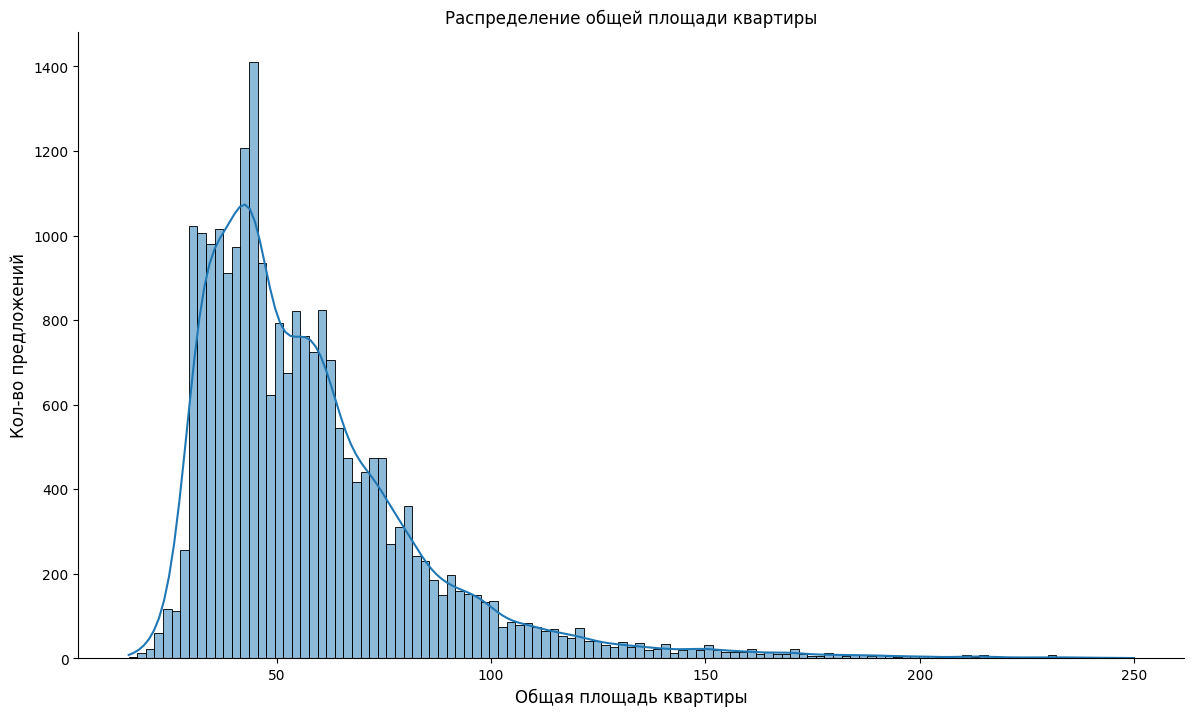

In [90]:
#напишем функцию построения гистограммы и статистических данных
def hist(column, xlab, title, a=7, kde=True, desc=True):
    sns.displot(column, 
                kde=kde, 
                height=a,
                aspect = 12/a);
    
    plt.ylabel('Кол-во предложений', fontsize=12);
    plt.xlabel(xlab, fontsize=12);
    plt.title(title, fontsize=12);
    
    if desc == True:
        return column.describe()
    

hist(data['total_area'], xlab = 'Общая площадь квартиры', title = 'Распределение общей площади квартиры')



* 75 % объявлений приходятся на квартиры площадью до 65 кв.м; 
* медиана и среднее почти равны;
* распределение похоже на нормальное, а основная доля объявлений приходится на квартиры общей площадью 30 - 65 кв.м, но есть скачок, начиная с 50 кв.м. Возможно из-за метода, с помощью которого заполнили пропущенные значения.



##### жилая площадь

count    21145.000000
mean        33.292987
std         17.922041
min          6.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        184.000000
Name: living_area, dtype: float64

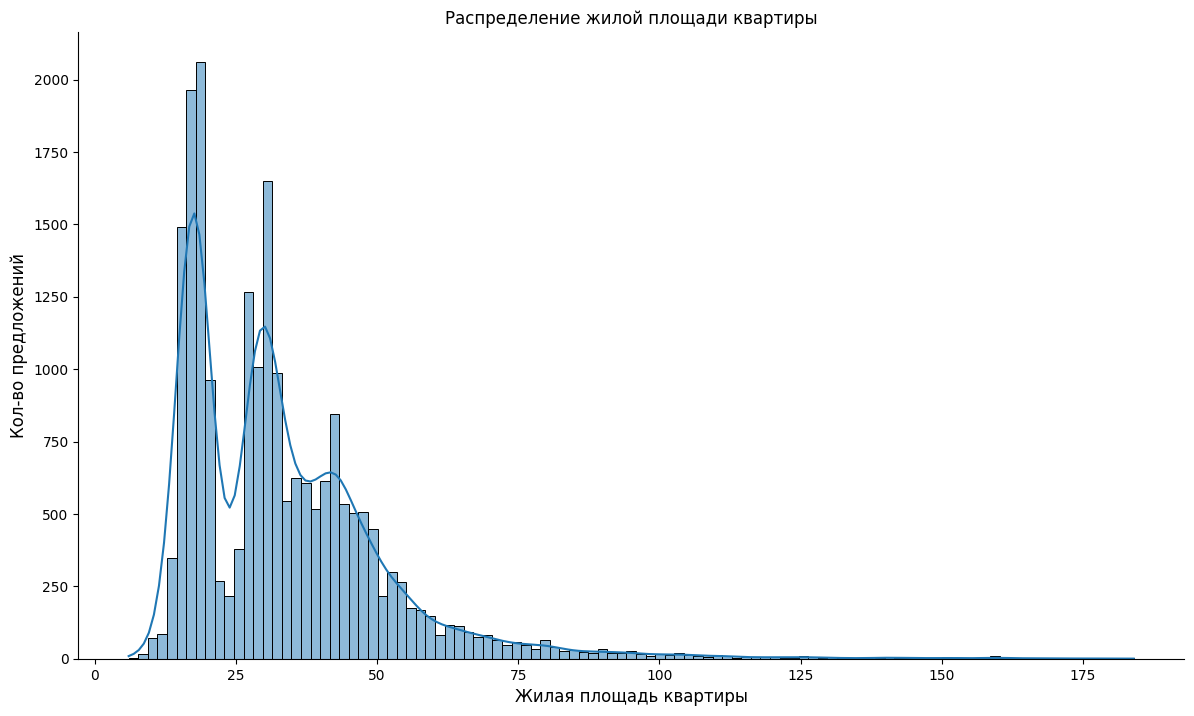

In [91]:
hist(data['living_area'], xlab = 'Жилая площадь квартиры', title = 'Распределение жилой площади квартиры')

* много квартир с жилой зоной от 15 - 20 кв.м. Скорее всего студии; 

* второй по многочисленности разброс от 24 - 35 кв.м. Скорее всего 1-2 комнатные квартиры;

* мало квартир с жилой площадью более 60 кв.м.

##### площадь кухни

count    20795.000000
mean        10.371022
std          5.208089
min          5.000000
25%          7.000000
50%          9.000000
75%         11.900000
max         70.000000
Name: kitchen_area, dtype: float64

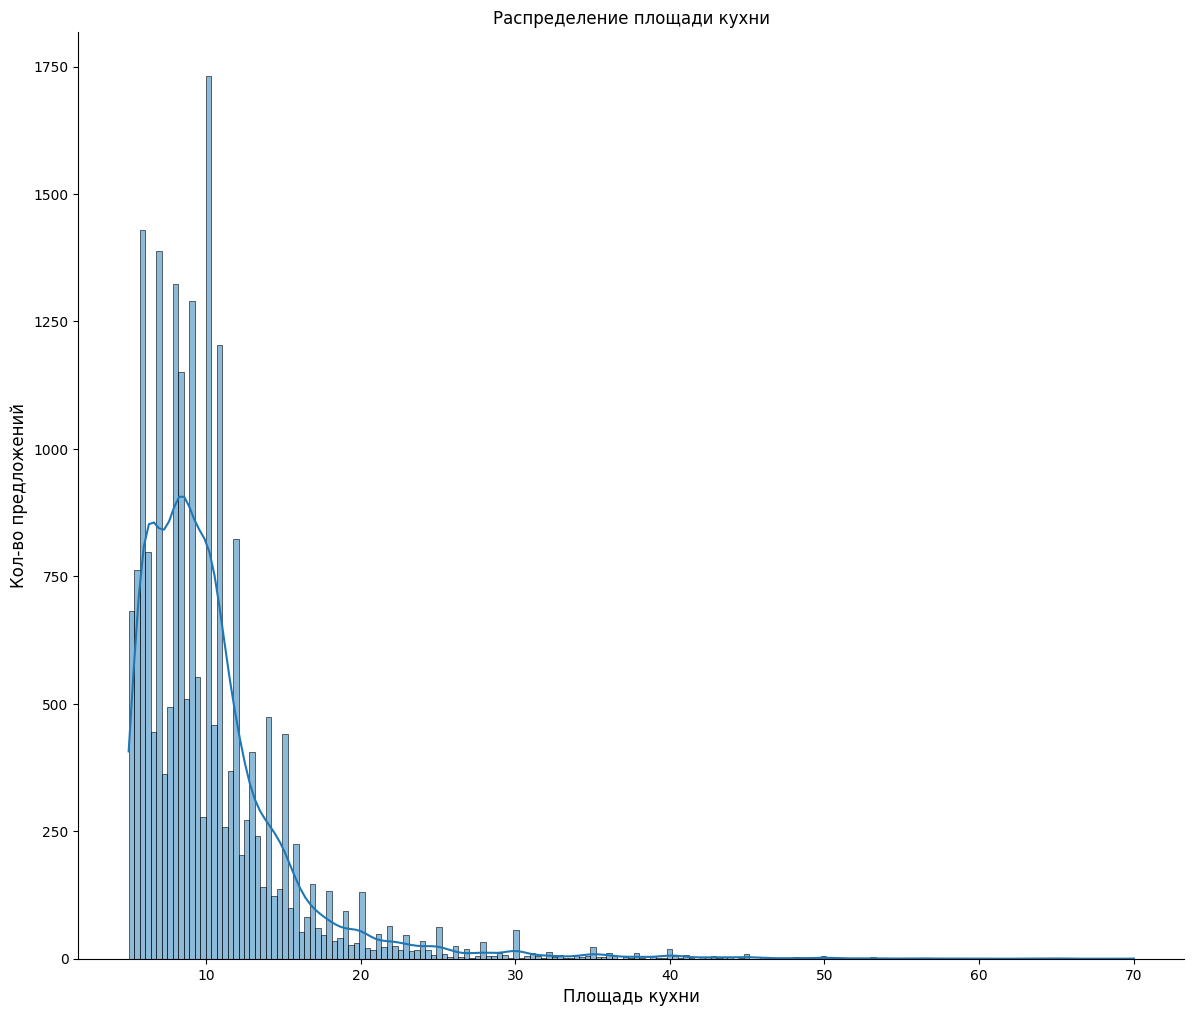

In [92]:
hist(data['kitchen_area'], xlab = 'Площадь кухни', title = 'Распределение площади кухни', a = 10)

* до 75% объявлений занимаю кухни до 11.9 кв.м, что похоже на правду; 
* есть кухни от 15 до 55.7 кв.м. Скорее всего это квартиры, где гостиная объединена с кухней.

##### цена объекта

count    2.295100e+04
mean     5.879123e+06
std      4.698795e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      5.000000e+07
Name: last_price, dtype: float64

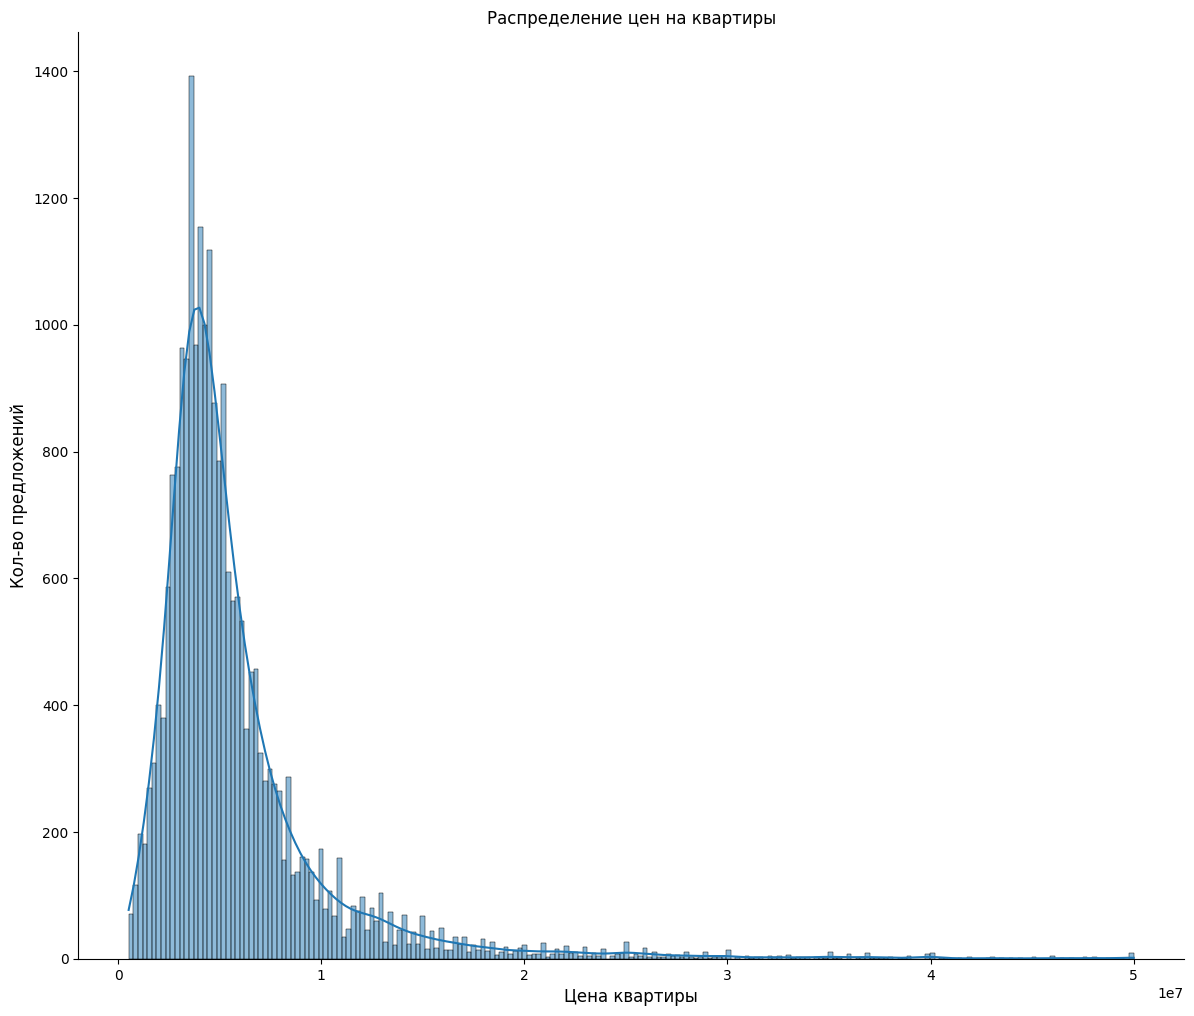

In [93]:
hist(data['last_price'],xlab = 'Цена квартиры', title = 'Распределение цен на квартиры', a = 10)

* до 75% объявлений с ценами на квартиру до 6.6 млн. рублей. 
* есть несколько стоимостью меньше 1 млн. рублей (скорее всего это квартиры в отдаленных районах Ленинградской области);
* максимальная цена квартиры 50 млн. рублей.

##### количество комнат

count    22951.000000
mean         2.038517
std          1.013889
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

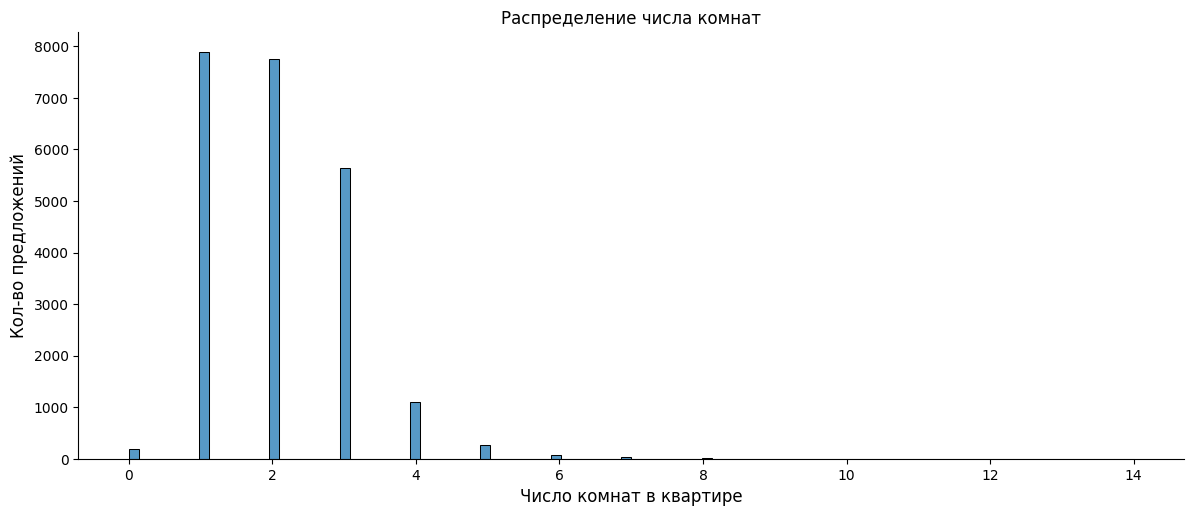

In [94]:
hist(data['rooms'], xlab = 'Число комнат в квартире', title = 'Распределение числа комнат', a=5, kde=False)

* есть объявления с 0 комнат, скорее всего это студии;
* основная часть объявлений с квартирами 1-3 комнат.

##### высотка потолков

count    14002.000000
mean         2.707652
std          0.221550
min          2.400000
25%          2.500000
50%          2.600000
75%          2.800000
max          3.500000
Name: ceiling_height, dtype: float64

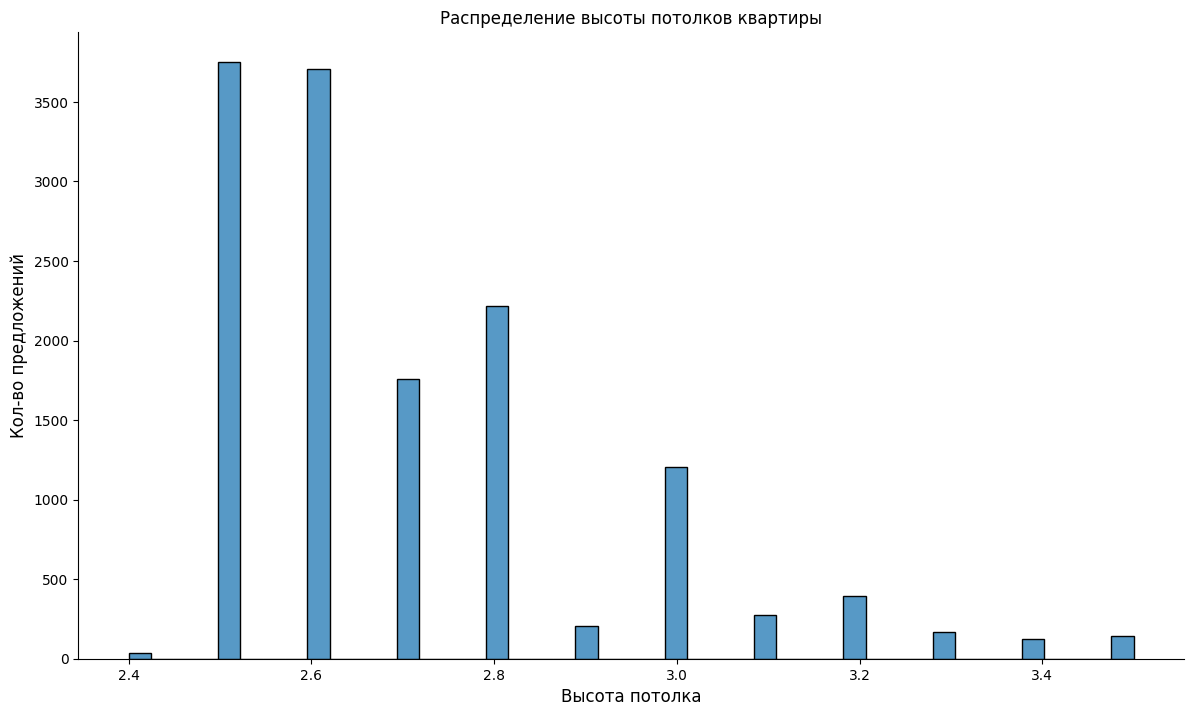

In [95]:
hist(data['ceiling_height'],xlab = 'Высота потолка', title = 'Распределение высоты потолков квартиры', kde=False)

* большая часть - это потолки высотой 2.5 - 2.8 м.;
* очень мало с высотой 2.9 м. (возможно, это нестандартная высота);
* более 1500 с потолками 3.0 м;


##### этаж квартиры

count    22951.000000
mean         5.917564
std          4.894655
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

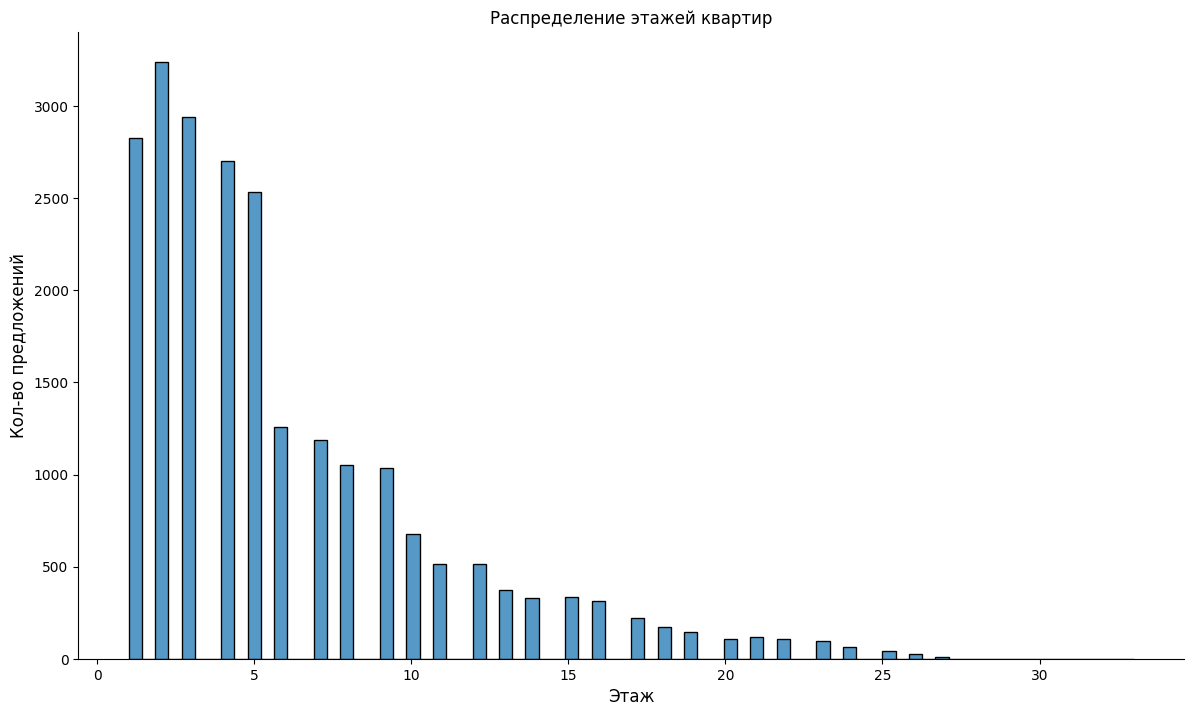

In [96]:
hist(data['floor'], xlab = 'Этаж', title = 'Распределение этажей квартир', kde=False)

* большинство объявлений это квартиры до 5 этажа;
* с увеличением этажа уменьшаются и количество объявлений, что логично, так как высотных зданий меньше и учитывается не только Санкт-Петербург.

##### тип этажа

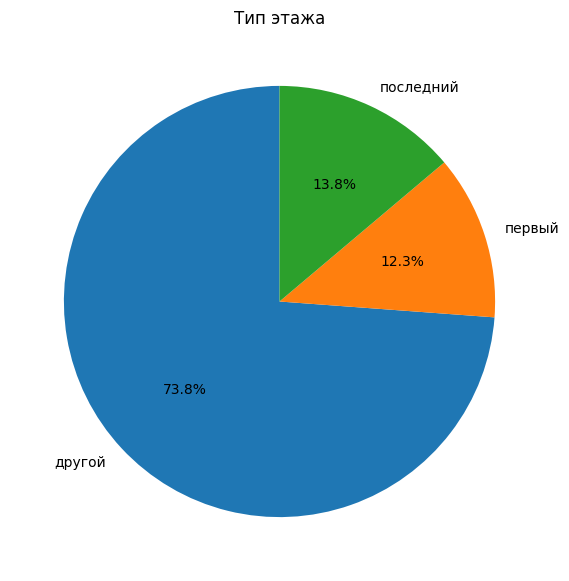

In [97]:
# для этоq категориальной переменной построиv круговую диаграмму

# сначала сгруппируем данные и посчитаем количество предложений каждого типа
floors_grouped = data.pivot_table(index='floor_type', values='total_images', aggfunc='count')

# теперь построим диаграмму
floors_grouped.plot(kind='pie', 
                    y='total_images', 
                    autopct='%1.1f%%', 
                    startangle=90, 
                    legend=False, 
                    figsize=(7,7));
plt.title('Тип этажа');
plt.ylabel('');


* 75% объявлений это квартиры между первым и последним этажем (логично ведь в одном здании только один первый и последний этаж);


##### общее количество этажей в доме

count    22951.000000
mean        10.777352
std          6.591261
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

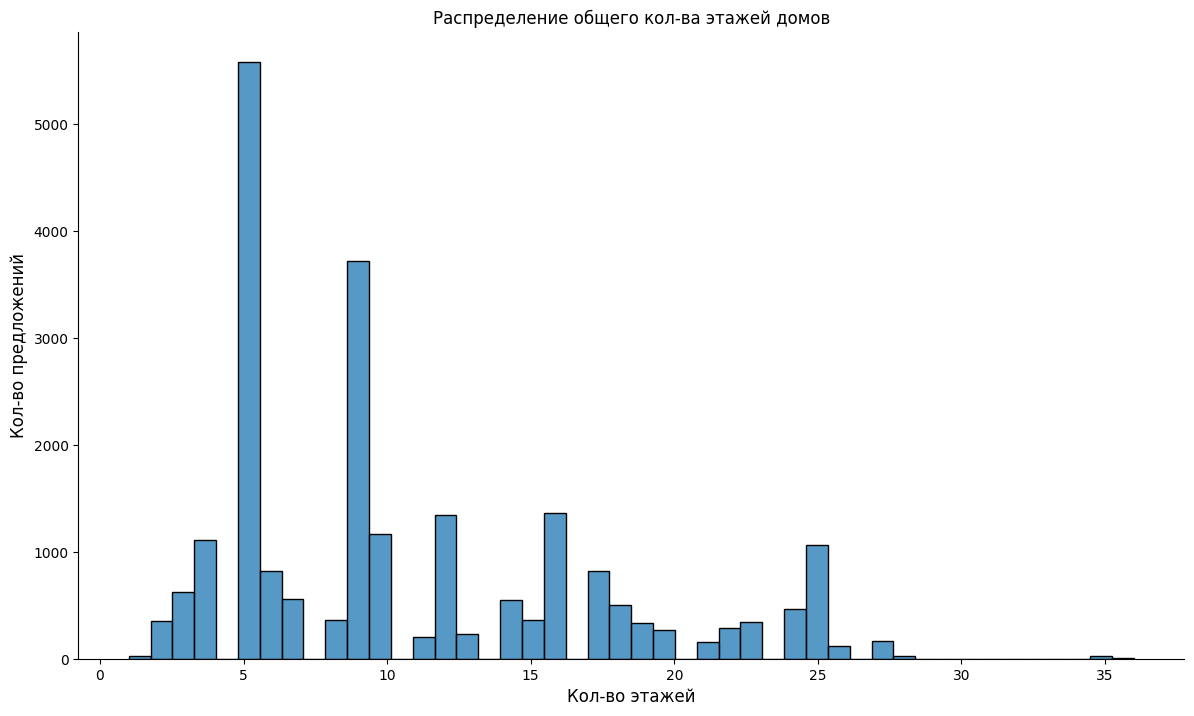

In [98]:
hist(data['floors_total'], xlab = 'Кол-во этажей', title = 'Распределение общего кол-ва этажей домов', kde=False)

* очень много 5-ти и 9-ти этажек;
* связано с тем, что в СССР строили преимущественно 9-этажные дома по той причине, что их высота соответствовала высоте механизированной лестницы пожарной машины – 28 метров, соответственно, она не вытягивалась выше девятого этажа;
* с 1956 года в основном строились 5-ти этажные дома -  "хрущевки".

##### расстояние до центра города в метрах

count    17537.000000
mean     14363.708445
std       8525.493191
min        181.000000
25%       9595.000000
50%      13220.000000
75%      16366.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

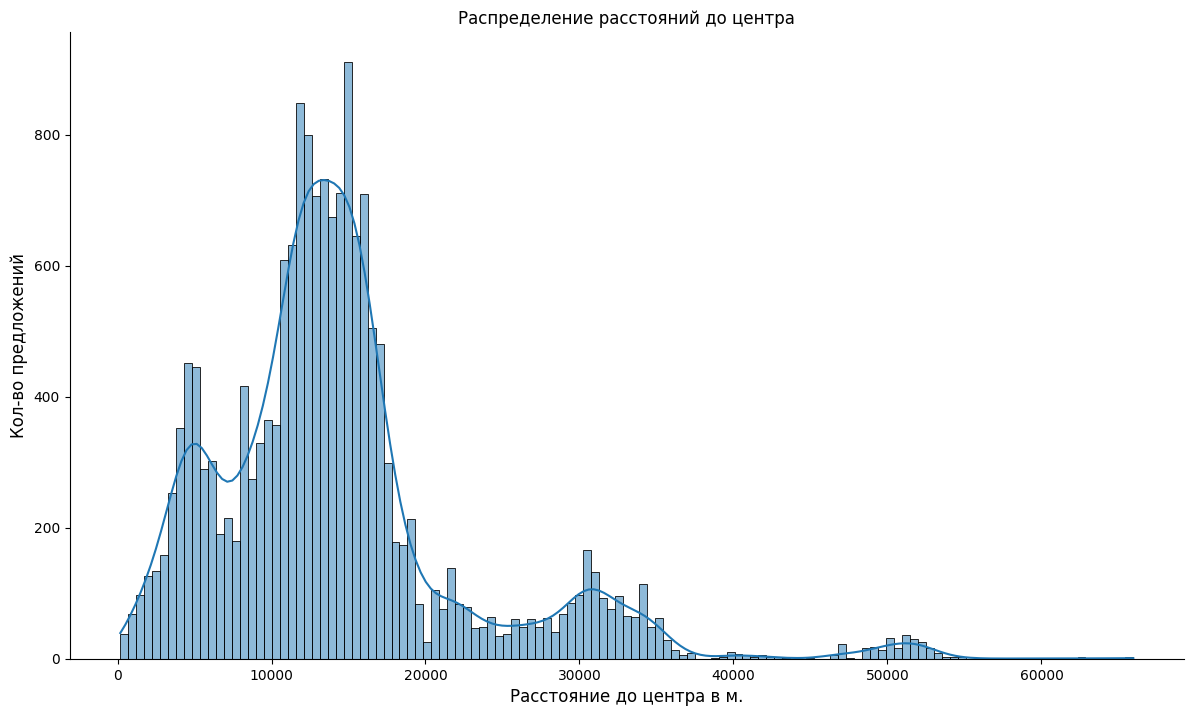

In [99]:
hist(data['cityCenters_nearest'], xlab = 'Расстояние до центра в м.', title = 'Распределение расстояний до центра',)

* большинство квартир в пределах 10 - 17 км, то есть в черте города и не в центре;
* среднее и медианное значение мало отличаются, но стандартное отклонение в 8.5 километров довольно большое.

##### расстояние до ближайшего аэропорта

count    17517.000000
mean     28858.488954
std      12697.568990
min          0.000000
25%      18459.000000
50%      26938.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

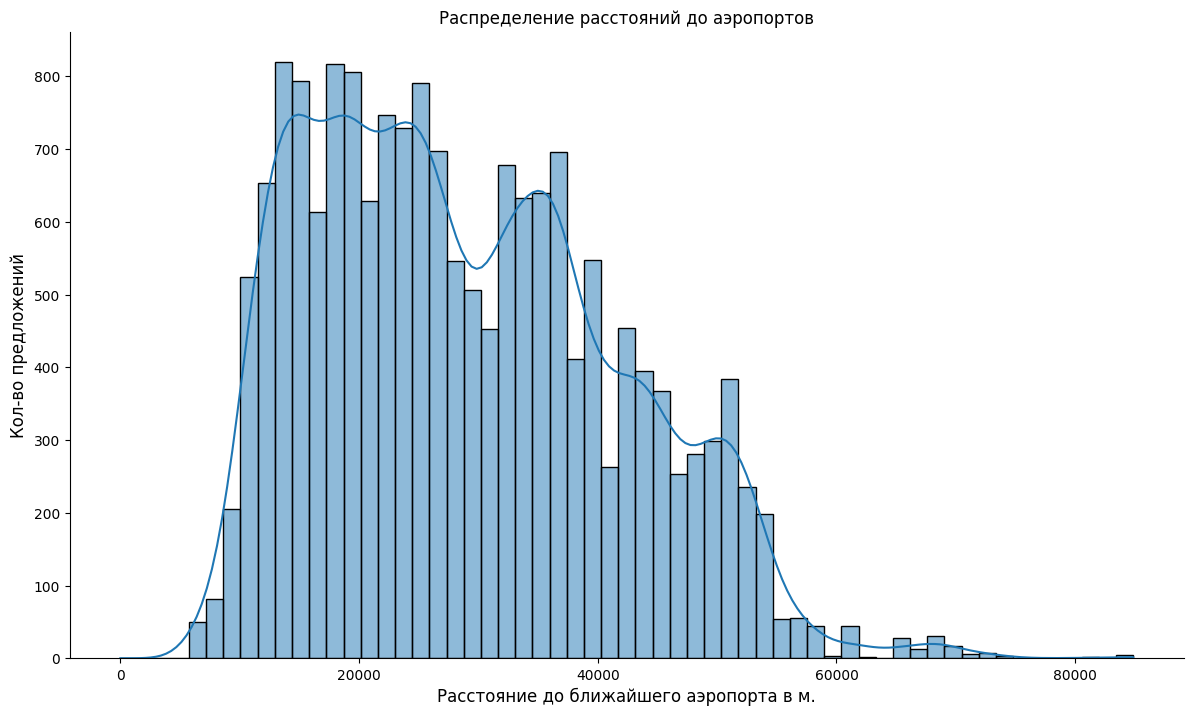

In [100]:
hist(data['airports_nearest'], xlab = 'Расстояние до ближайшего аэропорта в м.', title = 'Распределение расстояний до аэропортов',)

* мы уже обрабатывали картографические данные, и они были искажены, поэтому минимальное значение до ближайшего аэропорта 0 м.;
* большинство объявлений от 10 - 30 километров до ближайшего аэропорта;

##### расстояние до ближайшего парка

count    7682.000000
mean      493.172872
std       343.507710
min         1.000000
25%       289.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

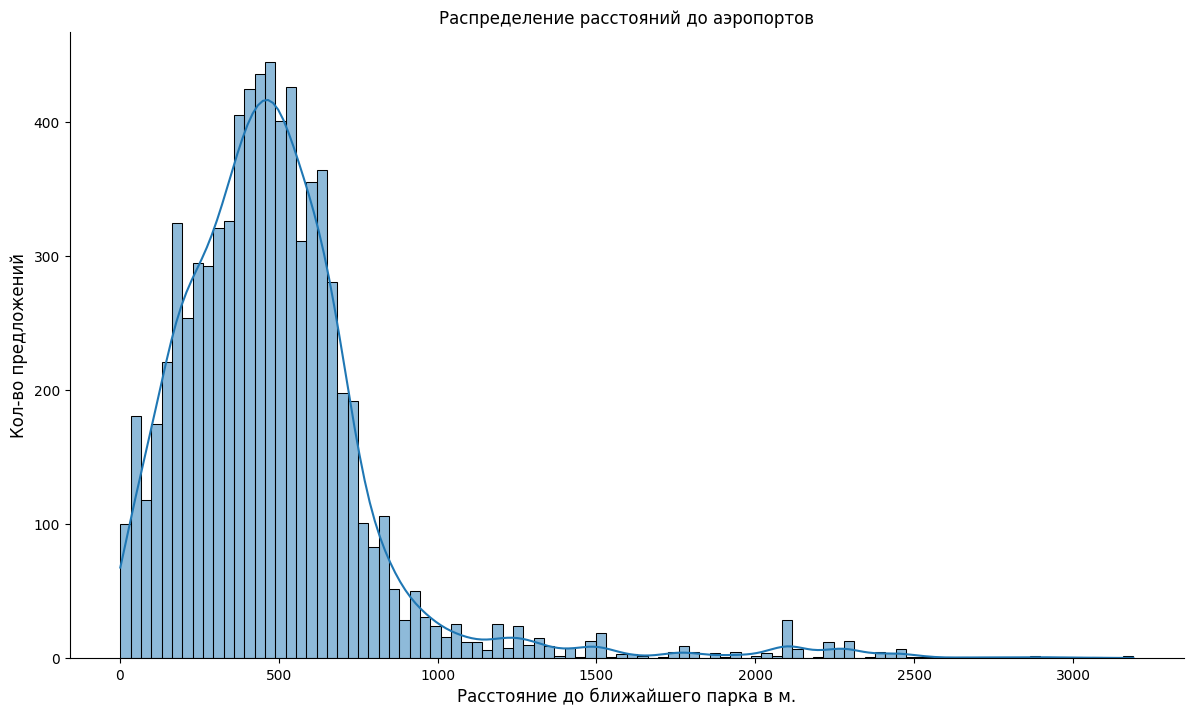

In [101]:
hist(data['parks_nearest'], xlab = 'Расстояние до ближайшего парка в м.', title = 'Распределение расстояний до аэропортов',)

* мало объявлений недвижимости, которые дальше 600 метров от ближайшего парка;
* скорее всего минимальное расстояние до парка от жилых зданий регулируются нормами.


##### день публикации объявления

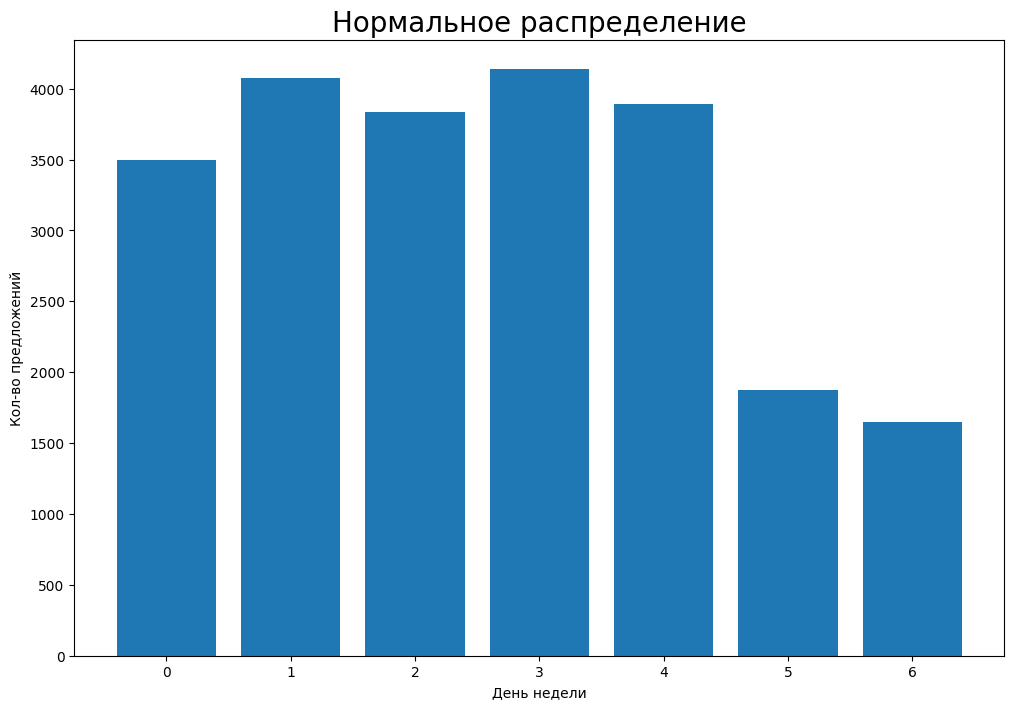

In [102]:
# построим круговую диаграмму
# сначала сгруппируем данные
days_grouped = data.pivot_table(index='weekday_expo', values='total_images', aggfunc='count')
days_grouped = days_grouped.reset_index()
# теперь построим диаграмму

x=days_grouped['weekday_expo']
y=days_grouped['total_images']

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x, y)
ax.set_title('Нормальное распределение',
                fontsize = 20)
ax.set_xlabel('День недели')
ax.set_ylabel('Кол-во предложений')
plt.show()

* примерно одинаковое количество объявлений в будние дни, почти 85% от общего числа объявлений;
* по выходным в два раза меньше;

##### месяц публикации объявления

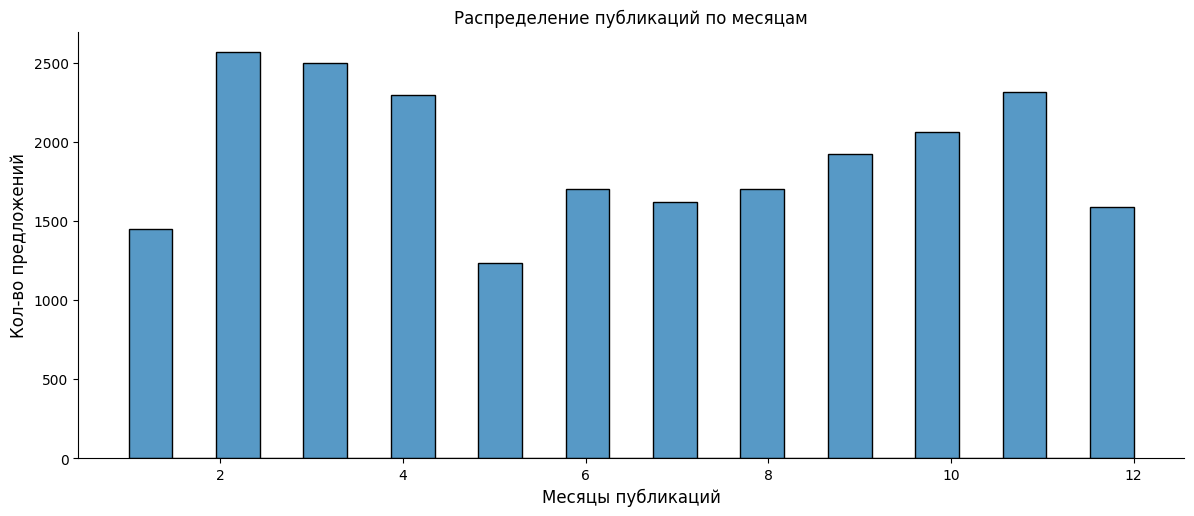

In [103]:
hist(data['month_expo'], 
     xlab = 'Месяцы публикаций', 
     title = 'Распределение публикаций по месяцам',
     a=5,
     kde=False,
     desc=False)

* февраль, март, апрель, октябрь, ноябрь - на эти месяцы приходится больше всего публикаций объявлений;
* в праздничные месяцы почти вдвое меньше публикаций;

У недвижимости тоже есть сезонность и обычно самый высокий спрос на квартиры - это весна. С начала февраля начинается увеличения количества предложений по аренде и продаже жилых помещений и продолжается до конца апреля. Поэтому в феврале больше всего публикаций.

#### время продаж квартир

По заданию необходимо определить как быстро продавались квартиры. Данные о времени продаж находятся в колонке `days_exposition`.

Сначала посмотрим сколько пропущенных значений в колонке.

In [104]:
data['days_exposition'].isna().sum()

3046

Этого достаточно, чтобы получить достаточно достоверные данные.

Построим гистограмму.

count    19905.000000
mean       179.351670
std        218.401116
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

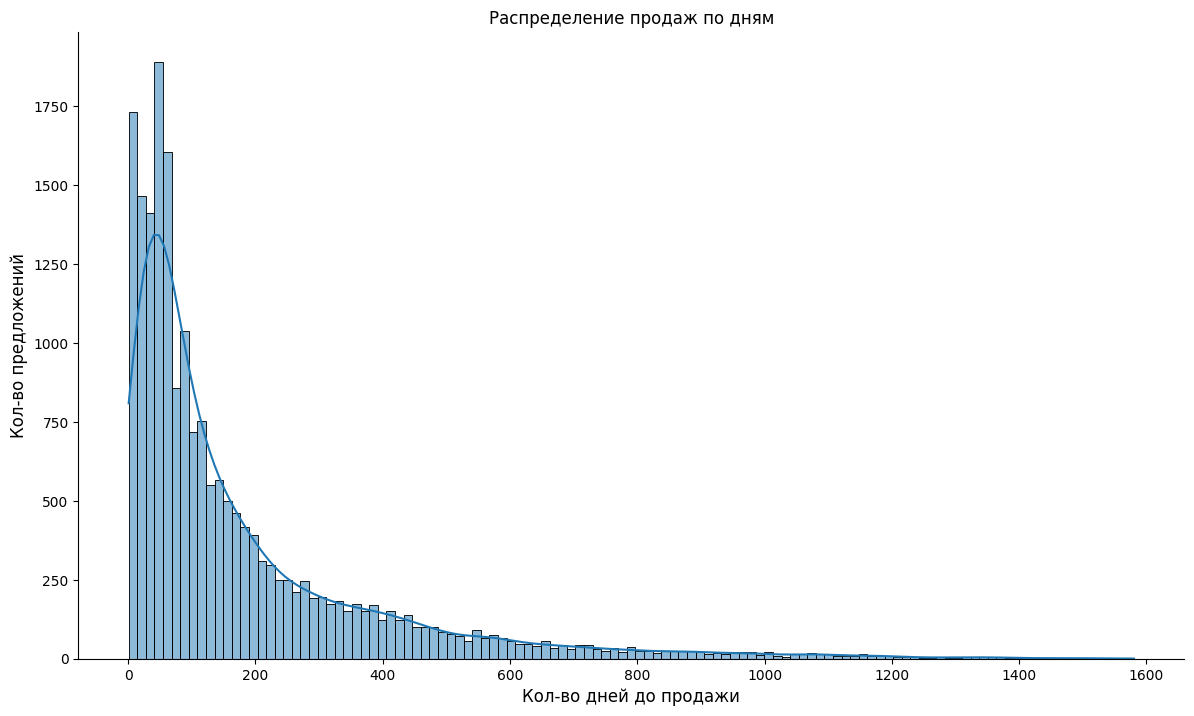

In [105]:
hist(data['days_exposition'], xlab = 'Кол-во дней до продажи', title = 'Распределение продаж по дням', a=7, kde=True)

* медиана в два раза больше среднего значения;
* есть объявления, которые видимо не закрыли после завершения сделки (висели несколько лет);
* половина квартир продавались в течение 3 месяцев, но есть странные значения в несколько дней.

Построим диаграмму размаха и удалим выбросы. Посмотрим на диаграмму без выбросов.

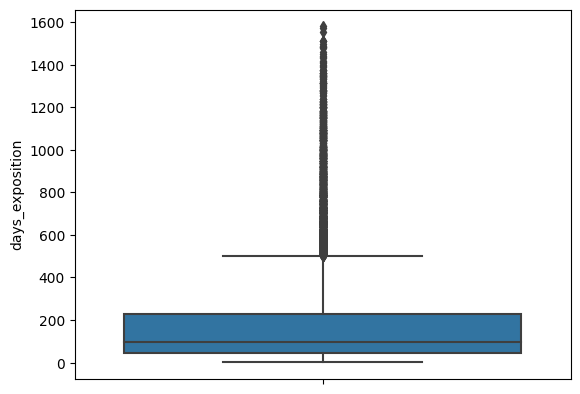

In [106]:
sns.boxplot(y = data['days_exposition']);


Выборка сроков продаж имеет длинный правый хвост, для таких распределений оптимально ориентироваться на значения 0,99 квантиля.

In [107]:
data['days_exposition'].quantile(0.99)

1063.8799999999974

Ограничим максимальный срок продаж по 

In [108]:
sell_time = data.copy()
sell_time = sell_time.query('days_exposition < 1064')

count    19705.000000
mean       168.869069
std        192.578010
min          1.000000
25%         44.000000
50%         93.000000
75%        221.000000
max       1061.000000
Name: days_exposition, dtype: float64

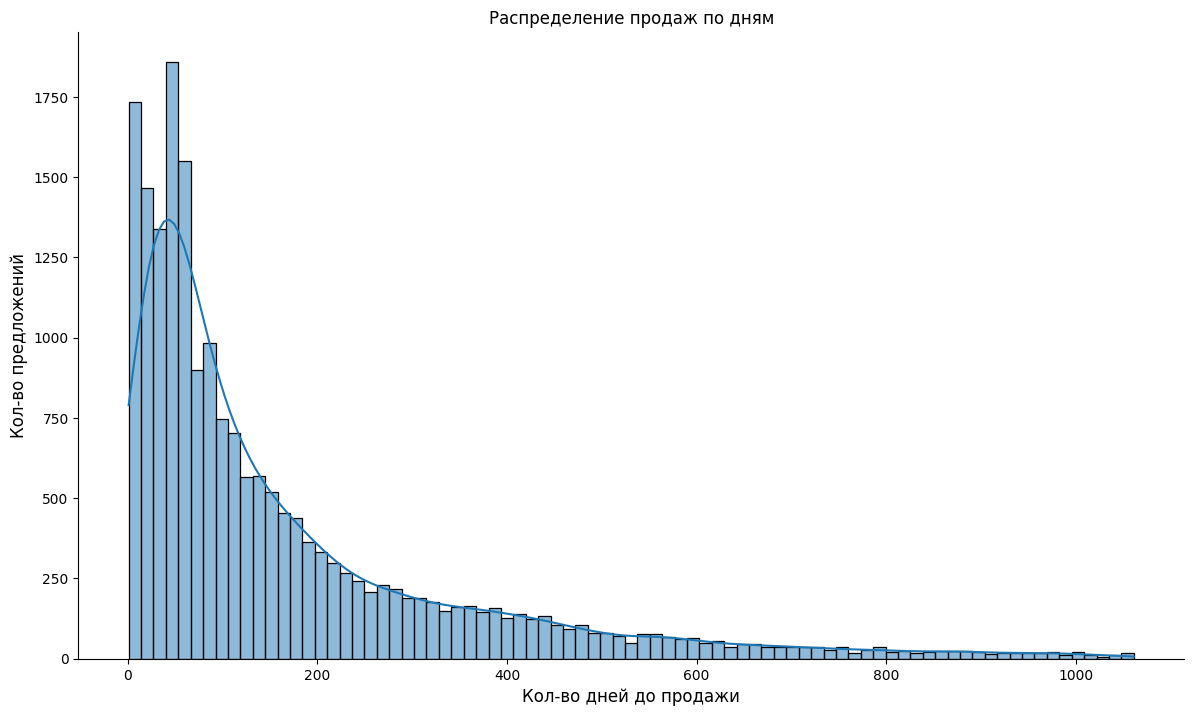

In [109]:
hist(sell_time['days_exposition'], xlab = 'Кол-во дней до продажи', title = 'Распределение продаж по дням', a=7)

Непонятна природа возникновения скачков в промежутке от 50 до 70 дней. Посмотрим вблизи. Для этого рассмотрим объявления от 40 до 80 дней.

In [110]:
sell_time = sell_time.query('days_exposition <= 70 and days_exposition >=40')

count    3801.000000
mean       53.233097
std         8.691579
min        40.000000
25%        45.000000
50%        53.000000
75%        60.000000
max        70.000000
Name: days_exposition, dtype: float64

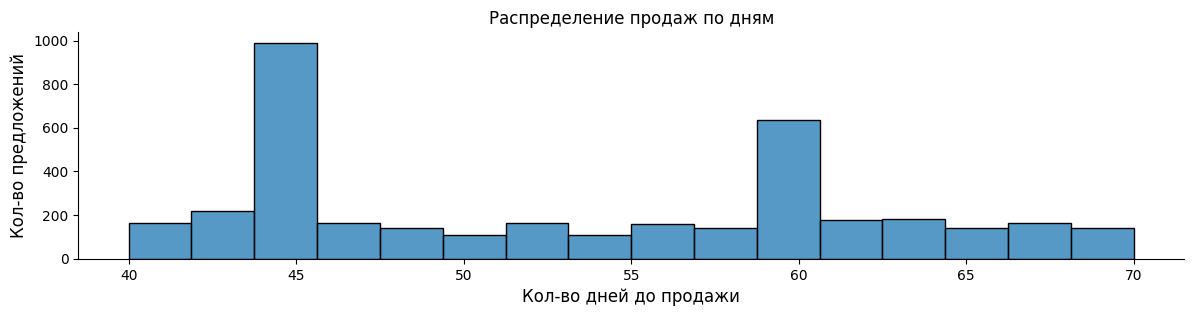

In [111]:
hist(sell_time['days_exposition'], xlab = 'Кол-во дней до продажи', title = 'Распределение продаж по дням', a=3, kde=False)


Скачки в 45 и 60 дней не случайны. По правилам Яндекс.Недвижимости можно оставлять только одно бесплатное объявление. В зависимости от стоимости квартиры бесплатный срок публикации может быть 45, 60 или 90 дней. Избавимся от объявлений с такими сроками и посмотрим на распределение. 

count    18330.000000
mean       190.000546
std        224.380712
min          1.000000
25%         41.000000
50%        109.000000
75%        249.000000
max       1580.000000
Name: days_exposition, dtype: float64

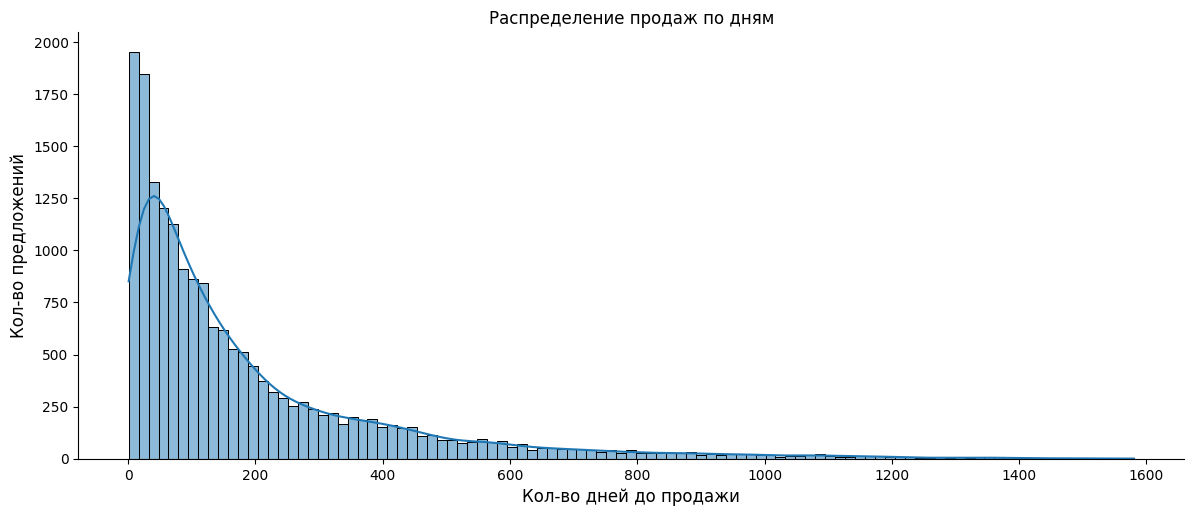

In [112]:
### Почему-то не выводятся строки с days_exposition = 45.0

# скопируем датафрейм, чтобы не портить основной
# избавимся от пропусков в таблице days_exposition и переведем в целые числа
dd = data.copy()
dd = dd.dropna(subset=['days_exposition'])

dd['days_exposition'] = dd['days_exposition'].astype('int64')

dd = dd.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90 ')

hist(dd['days_exposition'],xlab = 'Кол-во дней до продажи', title = 'Распределение продаж по дням', a=5)

* распределение стало более плавным, но значения квантилей и медианы не сильно изменились;
* в среднем продажа квартиры занимает чуть более 3-х месяцев;
* до 8 месяцев закрываются 75% объявлений;
* до 40 дней закрываются 25% объявлений;
* есть долгие объявления в несколько лет, которые скорее всего не закрыли продавцы после завершения сделки (> 4 лет);


In [113]:
print(len(data.query('days_exposition == 60')))
print(len(data.query('days_exposition == 45')))
print(len(data.query('days_exposition == 45.0')))
print(len(data.query('days_exposition == 90.0')))

533
0
0
0


####  зависимость цены от параметров

Для определения характера зависимости цены недвижимости от других параметров построим матрицу корреляции и диграмму рассеивания следующих параметров:

- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

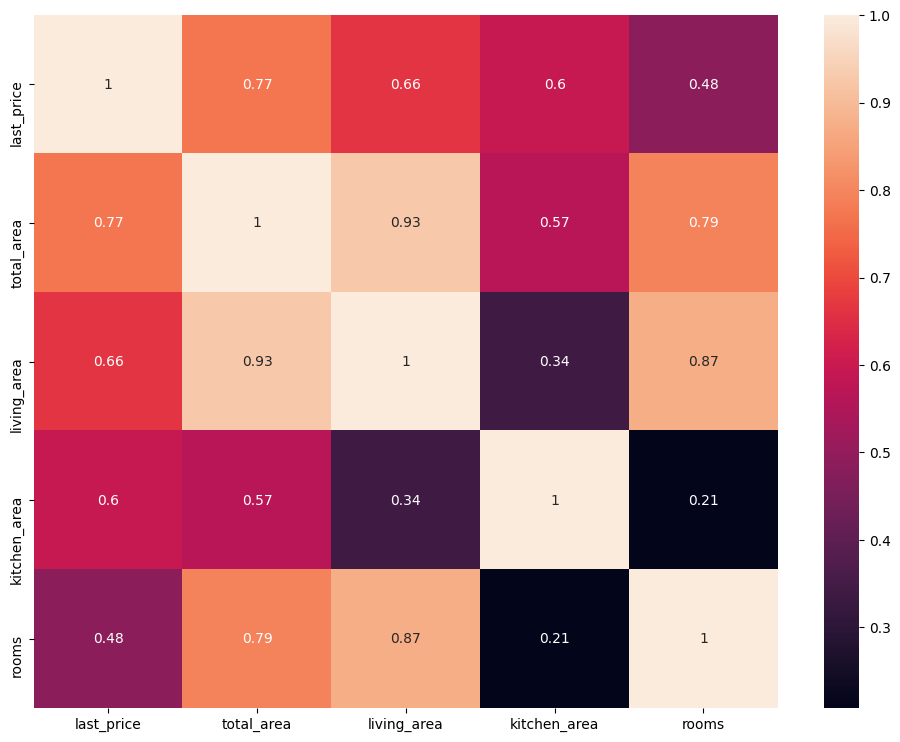

In [114]:
# создадим отдельный датафрейм с интересующими нас параметрами
data_corr = data[['last_price',
                  'total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_type'
                 ]]

dates_corr = data[['floor_type',
                    'last_price',
                    'weekday_expo', 
                    'month_expo', 
                    'year_expo'
                 ]]
# построим матрицу корреляций


corrmat = data_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, annot=True);

* больше всего на цену влияется общая площадь квартиры;
* чуть меньше жилая площадь и площадь кухни;
* меньше всего влияет количество комнат.

Для переменных `total_area`, `living_area`, `kitchen_area` построим диаграммы рассеивания и подробнее изучим зависимость.

Для переменных `rooms`, `weekday_expo`, `month_expo`, `year_expo` построим столбчатые диаграммы.

##### `total_area`, `living_area`, `kitchen_area`

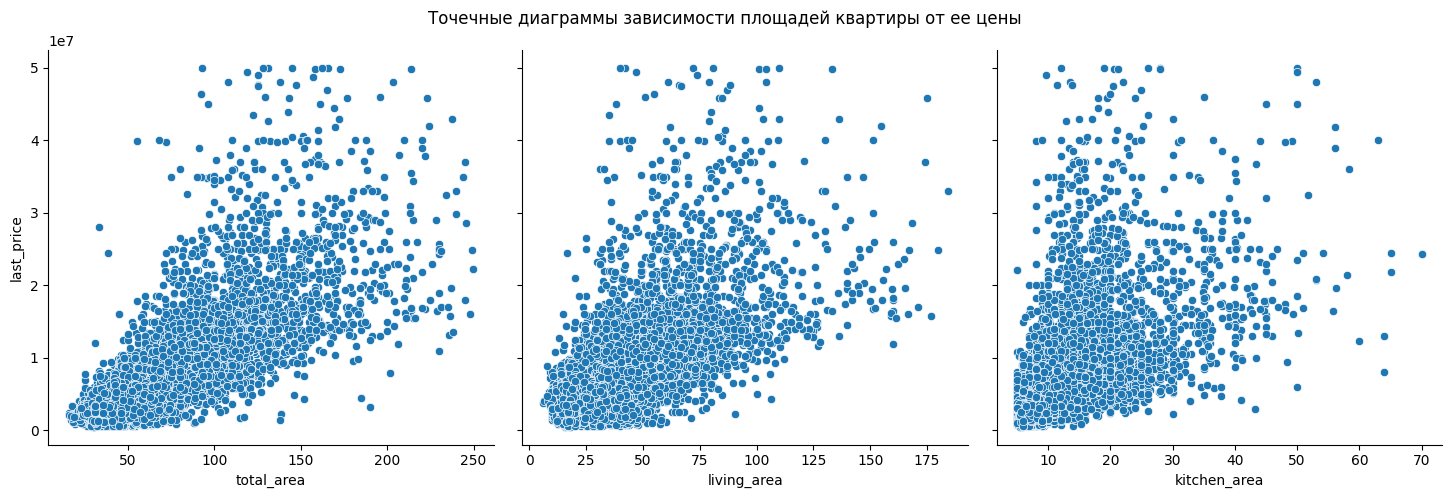

In [115]:
x_vars = ['total_area', 'living_area', 'kitchen_area']
y_vars = ['last_price']
g = sns.PairGrid(data_corr,  x_vars=x_vars, y_vars=y_vars, height = 5);
g.map_offdiag(sns.scatterplot);

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Точечные диаграммы зависимости площадей квартиры от ее цены');

Хоть и ранее обнаружили, что эти параметры имеют положительную и достаточно высокую корреляцию с ценой квартиры, есть выбивающиеся объявления из основной зависимости в каждом параметре.

В целом можно утверждать, что чем больше площадь каждого параметра тем выше стоимость недвижимости, но: 
1. Есть предложения с малой площадью, но с высокой стоимостью.
2. Есть предложения с большой площадью, но с низкой стоимостью.

На такой разброс скорее всего повлияли другие параметры (расстояние до центра, этаж, высота потолков и т.д.). И самая проблемная - это площадь кухни. По диаграмме рассеивания заметно, что есть два тренда. Один тренд  сильно коррелирует с ценой, а другой тренд коррелирует намного меньше. Это говорит о том, что есть достаточно высокая зависимость от других параметров квартиры.



#####  `weekday_expo`, `month_expo`, `year_expo`, `floor_type`

In [116]:
weekday = dates_corr.pivot_table(index=['weekday_expo'], values=['last_price'], aggfunc='mean').reset_index()

month = dates_corr.pivot_table(index=['month_expo'], values=['last_price'], aggfunc='mean').reset_index()

year = dates_corr.pivot_table(index=['year_expo'], values=['last_price'], aggfunc='mean').reset_index()

floor = dates_corr.pivot_table(index=['floor_type'], values=['last_price'], aggfunc='mean').reset_index() 

In [117]:
# check
def pivoting(df, index_column, values='last_price'):

#     global dt

    df = df.pivot_table(index = df[index_column], values = values, aggfunc = 'mean').reset_index()
#     index_column = df
    return df

In [118]:
# check
pivoting(data, 'total_area')

,total_area,last_price
0,15.5,2450000.0
1,16.0,2100000.0
2,17.0,1500000.0
3,17.2,2050000.0
4,17.6,3400000.0
...,...,...
1998,245.0,27500000.0
1999,245.4,28659000.0
2000,248.0,16000000.0
2001,249.0,24900000.0


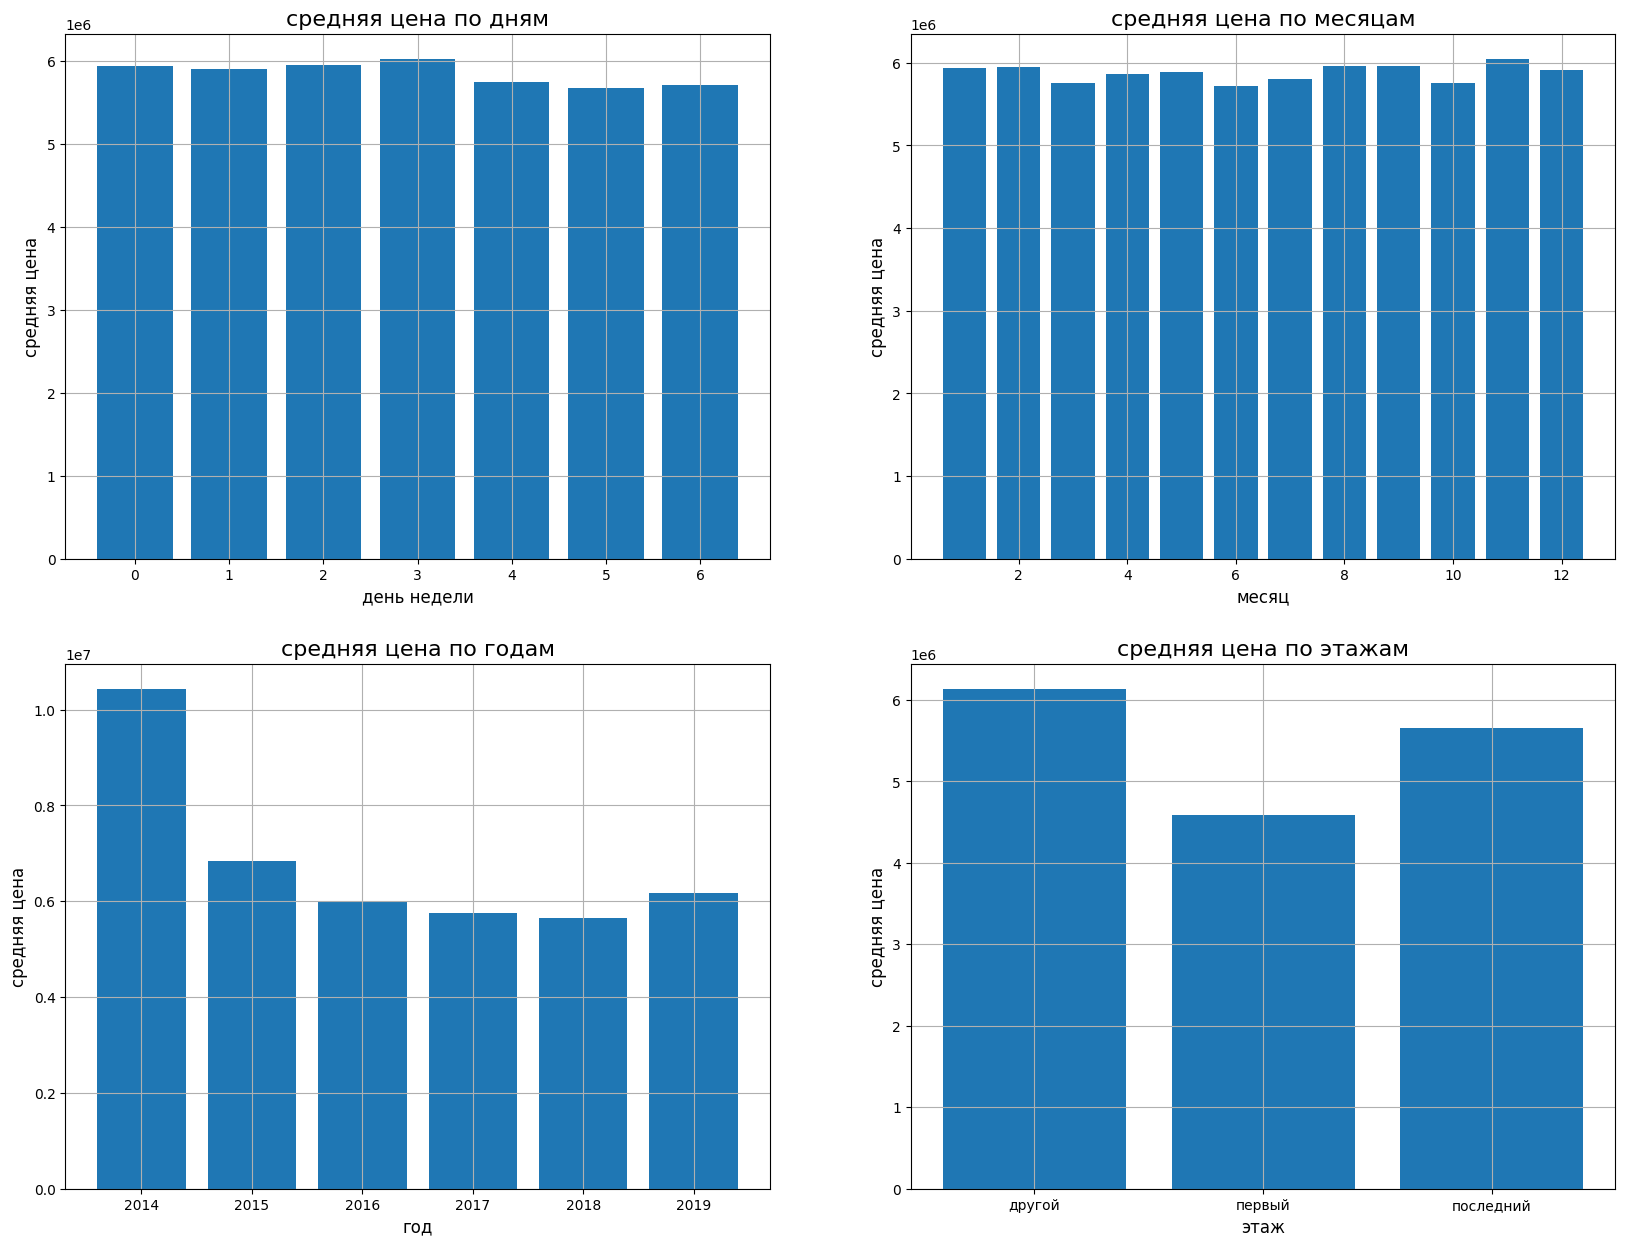

In [119]:
fig, axs = plt.subplots(2, 2,figsize=(20,15))

axs[0, 0].bar(weekday['weekday_expo'], weekday['last_price'])
axs[0, 1].bar(month['month_expo'], month['last_price'])
axs[1, 0].bar(year['year_expo'], year['last_price'])
axs[1, 1].bar(floor['floor_type'], floor['last_price']);


axs[0, 0].set_title('средняя цена по дням', fontsize=16)
axs[0, 0].set_xlabel('день недели', fontsize=12)
axs[0, 0].set_ylabel('средняя цена', fontsize=12)
axs[0, 0].grid()

axs[0, 1].set_title('средняя цена по месяцам', fontsize=16)
axs[0, 1].set_xlabel('месяц', fontsize=12)
axs[0, 1].set_ylabel('средняя цена', fontsize=12)
axs[0, 1].grid()

axs[1, 0].set_title('средняя цена по годам', fontsize=16)
axs[1, 0].set_xlabel('год', fontsize=12)
axs[1, 0].set_ylabel('средняя цена', fontsize=12)
axs[1, 0].grid()

axs[1, 1].set_title('средняя цена по этажам', fontsize=16)
axs[1, 1].set_xlabel('этаж', fontsize=12)
axs[1, 1].set_ylabel('средняя цена', fontsize=12)
axs[1, 1].grid()


* по диаграммам видно, что цена никак не зависит от месяца или дня недели объявления;
* 2014 год выделяется среди остальных, скорее всего причина в экономических событиях того года и изменение курса валюты;
* первый этаж самый дешевый, самые дорогие этажи, которые находятся между первым и последним;

Подробнее изучим случай со средней ценой по годам. Добавим количество предложений и среднюю площадь в каждый год.

In [120]:
year_mean = dates_corr.pivot_table(index=['year_expo'], values=['last_price'], aggfunc=('count','mean'))

area_mean = data.pivot_table(index=['year_expo'], values=['total_area'], aggfunc=('mean'))

year_mean.join(area_mean)

D:\ana\envs\ds_practicum_env\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(last_price, count)","(last_price, mean)",total_area
year_expo,,,
2014,131.0,1.043634e+07,81.629237
2015,1118.0,6.844693e+06,66.588506
2016,2661.0,6.009121e+06,60.088155
2017,7951.0,5.764722e+06,58.233371
2018,8301.0,5.647374e+06,56.601255
2019,2789.0,6.169884e+06,57.109975


Здесь заметны несколько явлений:

    1. Ранее говорили, что на высокую цену квартир в 2014 могли повлиять экономические проблемы в стране. Но как видно из таблицы объявлений за 2014 год всего 131. Если судить зависимость цены от года объявлений, то я бы не стал учитывать 2014 и 2015 год.
    
    2. С каждым годом средняя площадь квартиры уменьшается, но это довольно понятное явление. Все чаще люди в больших городах предпочитают выбирать однокомнатные квартиры, либо студии. А как ранее заметили, больше половина объявлений это Питер.
    
    3. Можно сказать, что средняя цена квартиры в 2017 и 2018 году примерно одинаковая. Разница составляет примерно в 1%.
    
    4. Данные за 2017 и 2018 год в сумме имеют более 70% от общих данных, поэтому стоит ориентироваться на них как на более репрезентативную выборку.

##### `rooms`

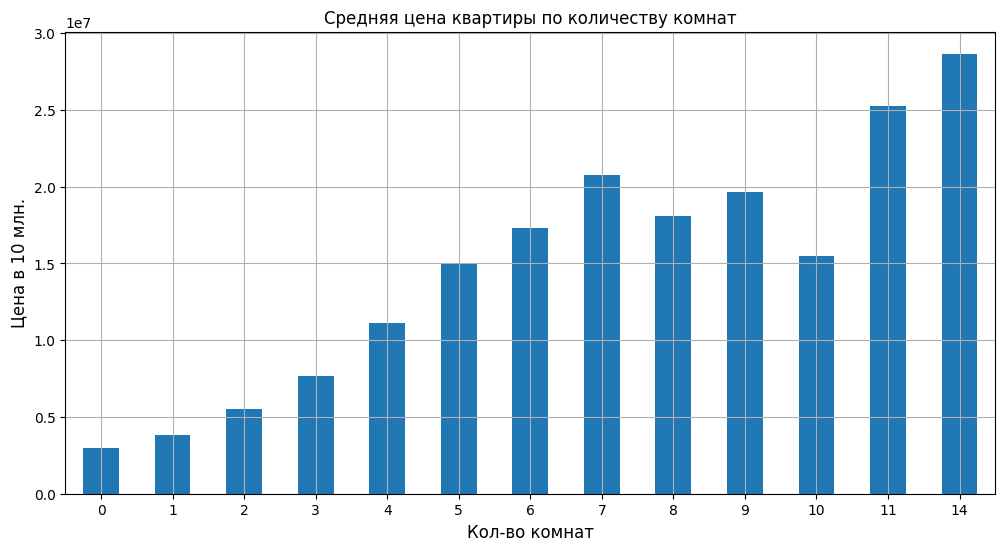

In [121]:
#сгруппируем данные по количеству комнат и посчитаем среднюю цену
rooms = data_corr.pivot_table(index='rooms', values='last_price', aggfunc=('mean'))

rooms.plot(y="last_price", kind='bar', figsize=(12,6), grid=True, legend=False, rot=0)
plt.ylabel('Цена в 10 млн.', fontsize=12);
plt.xlabel('Кол-во комнат', fontsize=12);
plt.title('Средняя цена квартиры по количеству комнат', fontsize=12);


Заметно, что с увеличением количества комнат увеличивается и стомость квартиры. Достаточно ожидаемо, ведь чем больше комнат, тем больше площадь квартиры. Так же заметно, что квартиры с комнатами 6, 7 и 8 отличаются мало. Скорее всего это связано с тем, что квартиры с 6-ю и больше комнатами малочисленны.  

Посмотрим на количество объявлений по каждой комнате.

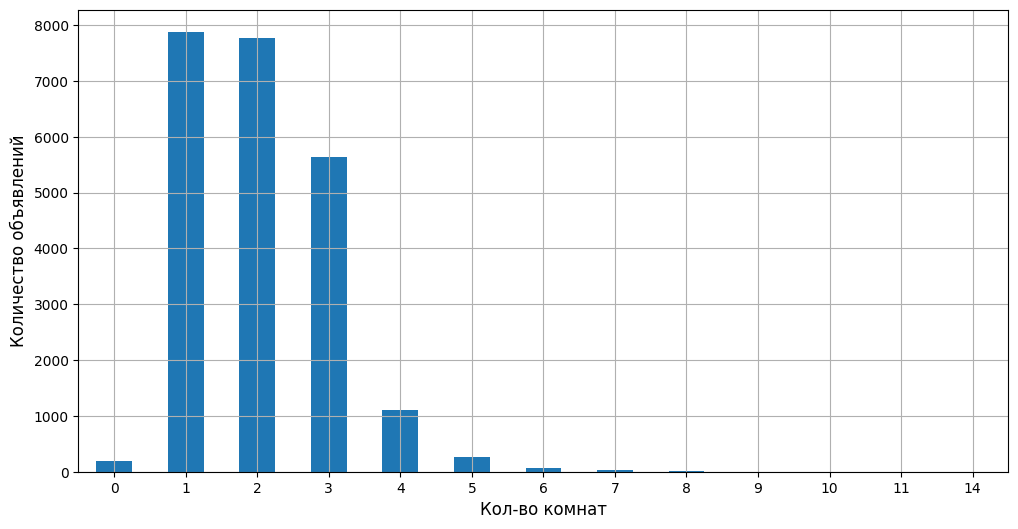

In [122]:
rooms = data_corr.pivot_table(index='rooms', values='last_price', aggfunc=('count'))

rooms.plot(y="last_price", kind='bar', figsize=(12,6), grid=True, legend=False, rot=0)
plt.ylabel('Количество объявлений', fontsize=12);
plt.xlabel('Кол-во комнат', fontsize=12);


Достоверно рассуждать и анализировать можно только те объявления, в которых 1, 2 или 3 комнаты. Остальных типов недвижимости мало. В дальнейшем можно объединить квартиры с 4-мя и более комнатами в одну категорию.

##### вывод

В ходе анализа выяснили, что:

* больше всего на цену квартиры влияет ее общая площадь;
* заметили, что зависимость цены от площади кухни имеет сильную зависимость от других параметров;
* есть небольшая корреляция с количеством комнат в квартире (чем больше комнат, тем больше площадь);
* из зависимости от года публикаций объявлений было выявлено, общая площадь квартир с каждым годом становится меньше, а цена не сильно отличается, если нет внешних факторов воздействия;
* месяц и день недели никак не влияют на стоимость квартиры;

#### средняя цена кв.м. в самых населенных пунктах

Необходимо посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, чтобы выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Для этого сначала отберем эти населенные пункты.

,locality_name,count,mean
0,санкт-петербург,15159,111844.0
1,мурино,581,85917.0
2,кудрово,469,95261.0
3,шушары,437,78490.0
4,всеволожск,394,68658.0
5,пушкин,359,102666.0
6,колпино,337,75333.0
7,парголово,327,90175.0
8,гатчина,301,68901.0
9,выборг,229,58292.0


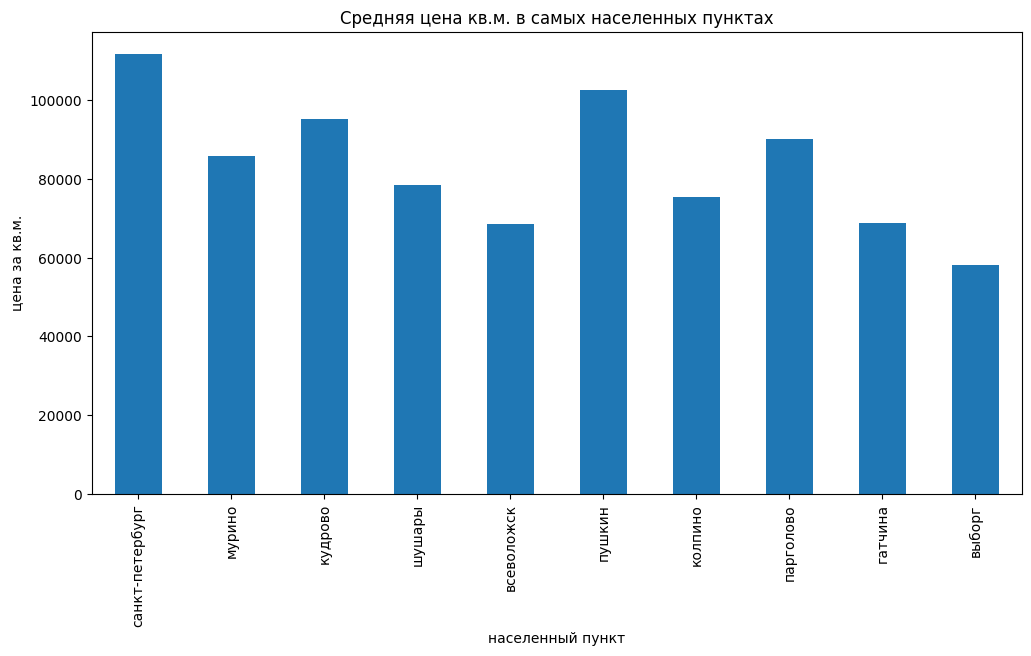

In [123]:
# сгруппируем населенные пункты по числу объявлений и цене за квадратный метр для 10 населенных пунктов

top_loc = (
    data.groupby('locality_name')['price_per_sqrm']
    .agg(['count','mean']) 
    .sort_values(by='count',ascending=False)
    .head(10)
    .round()
)
top_loc = top_loc.reset_index()

# построим диаграмму с ценой кв.м для каждого выделеннего населенного пункта
ax = top_loc.plot('count', 
                  kind='bar', 
                  xlabel='населенный пункт', 
                  ylabel='цена за кв.м.', 
                  legend=False,figsize=(12,6), 
                  title='Средняя цена кв.м. в самых населенных пунктах')

ax.set_xticklabels(top_loc.locality_name);
top_loc

Сантк-петербург ожидаемо оказался самым дорогим городом. Далее цена варьируется. Скорее всего влияет удаленность от Санкт-Петербурга.

#### средняя цена километра в Санкт-Петерубрге

Теперь необходимо определить и описать зависимость стоимости недвижимости от расстояния до центра города.

Сначала выделим квартиры, которые входят в сам Санкт-Петербург. Далее построим график изменения стоимости за каждый километр от центра.


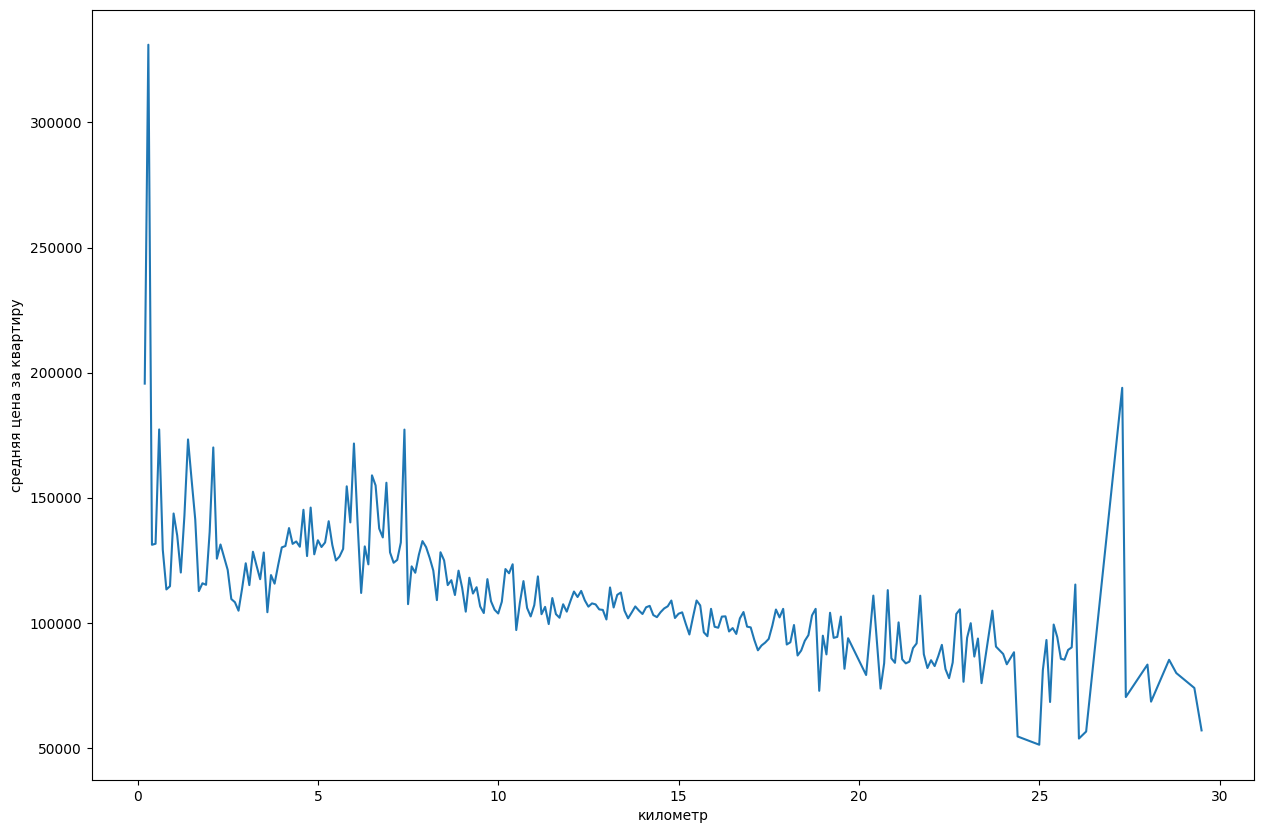

In [124]:
# скопируем из основного датасета интересующие параметры
spb_mean = data[['locality_name', 'price_per_sqrm', 'citycenters_km']].copy() 

# оставим тольпо Питер
spb_mean = spb_mean.loc[spb_mean['locality_name'] == 'санкт-петербург']

# сгруппируем по километру среднюю цену за квартиру и построим график изменения цены
spb_mean.groupby('citycenters_km')['price_per_sqrm'].mean().plot(figsize=(15,10), xlabel='километр', 
                  ylabel='средняя цена за квартиру', );

1. Чем дальше квартира от центра города, тем она дешевле, что в принципе ожидаемо.
2. На промежутке 25-28 километров наблюдается резкий скачок средней цены вверх.
3. Так же в центре наблюдаются резкие скачки и спады.

Посмотрим данные основного датасета с объявления, которые входят в Санкт-Петербург и удалены примерно на 25-28 километров.

In [125]:
data.query('locality_name == "санкт-петербург" and citycenters_km >= 26 ').sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqrm,weekday_expo,month_expo,year_expo,floor_type,citycenters_km
748,13,14350000,74.0,2017-11-28,2,3.1,5,30.0,3,False,...,1496.0,0.0,NaN,128.0,193918.0,1,11,2017,другой,27.3
814,0,7600000,111.0,2017-07-26,3,3.0,16,63.0,12,False,...,185.0,2.0,72.0,66.0,68468.0,2,7,2017,другой,28.1
23145,17,6300000,92.0,2017-07-20,3,NaN,16,46.0,7,False,...,36.0,2.0,46.0,14.0,68478.0,3,7,2017,другой,28.0
22916,0,5144000,64.0,2015-10-14,2,NaN,5,33.0,5,False,...,NaN,0.0,NaN,285.0,80375.0,2,10,2015,последний,28.0
17798,0,4990000,71.0,2015-10-14,3,NaN,5,42.0,1,False,...,NaN,0.0,NaN,285.0,70281.0,2,10,2015,первый,28.0
10798,10,4850000,62.0,2017-05-16,3,NaN,5,35.7,1,False,...,NaN,0.0,NaN,63.0,78225.0,1,5,2017,первый,28.6
11652,16,4700000,51.0,2016-06-07,2,2.6,5,30.0,1,False,...,NaN,0.0,NaN,539.0,92156.0,1,6,2016,первый,28.6
19892,20,4370000,54.7,2016-03-23,3,2.5,5,32.8,5,False,...,NaN,0.0,NaN,939.0,79890.0,2,3,2016,последний,28.8
13031,16,4200000,56.8,2018-07-04,2,3.5,3,27.9,1,False,...,NaN,0.0,NaN,187.0,73943.0,2,7,2018,первый,29.3
14146,18,4150000,36.0,2018-09-05,1,2.5,10,20.0,7,False,...,NaN,0.0,NaN,45.0,115277.0,2,9,2018,другой,26.0


Похоже, что скачок произошел на 27-ом километре. Всего два предложения о продаже. Одно стоимостью почти 15 млн. рублей, а другое 2.2 млн. рублей.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />принимается, кол-во наблюдений важный параметр для оценки качества данных
        
у нас всего 2 записи на 27-м км., одна из которых с аномальной ценой, по этой причине мы отвергаем данное наблюдение

Попробуем определить причину или причины, вызвавшие скачки в центре.

In [126]:
# сгруппируем данные по нас.пункту Питер и отдаленность до 5 км.
spb_center = data.copy()
spb_center = spb_center.loc[spb_center['citycenters_km'] <= 5]

Разделим на два датасета в зависимости от удаленности и проанализируем параметры недвижимости.

In [127]:
spb_center_3km = spb_center.query('citycenters_km <= 3')
spb_center_5km = spb_center.query('citycenters_km <= 5 and citycenters_km > 3')


spb_center_3km[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']].describe().T


,count,mean,std,min,25%,50%,75%,max
rooms,537.0,3.104283e+00,1.462313e+00,0.0,2.000,3.0,4.00,14.0
total_area,537.0,9.178777e+01,4.134505e+01,16.0,63.300,83.6,110.00,245.4
ceiling_height,362.0,3.104144e+00,2.656919e-01,2.5,2.925,3.1,3.30,3.5
days_exposition,448.0,2.522656e+02,2.781864e+02,3.0,63.000,138.5,354.75,1572.0
last_price,537.0,1.189119e+07,7.696135e+06,2100000.0,7300000.000,9500000.0,13900000.00,50000000.0
living_area,503.0,5.733917e+01,2.992790e+01,9.0,35.950,50.9,70.70,176.6
kitchen_area,489.0,1.413108e+01,8.062104e+00,5.0,9.000,11.5,16.60,56.2
floor,537.0,3.076350e+00,1.428566e+00,1.0,2.000,3.0,4.00,7.0
floors_total,537.0,4.819367e+00,1.081975e+00,2.0,4.000,5.0,6.00,8.0


In [128]:
spb_center_5km[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']].describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,1331.0,2.841473e+00,1.327995e+00,0.0,2.000,3.00,4.0,11.0
total_area,1331.0,8.715276e+01,3.964100e+01,15.5,59.250,79.00,108.6,248.0
ceiling_height,845.0,3.041538e+00,2.398459e-01,2.4,2.900,3.00,3.2,3.5
days_exposition,1122.0,2.566872e+02,2.829901e+02,3.0,60.000,141.50,366.5,1512.0
last_price,1331.0,1.121913e+07,6.948820e+06,1600000.0,6750000.000,9100000.00,13000000.0,50000000.0
living_area,1232.0,5.092500e+01,2.726231e+01,6.0,31.675,45.35,65.0,166.7
kitchen_area,1220.0,1.393016e+01,7.241988e+00,5.0,9.300,12.00,16.0,56.0
floor,1331.0,4.163035e+00,3.146501e+00,1.0,2.000,3.00,5.0,25.0
floors_total,1331.0,7.104433e+00,4.084860e+00,2.0,5.000,6.00,7.0,25.0


1. На промежутке от 3 до 5 километров находится в три раза больше продаваемой недвижимости, чем на промежутке от 0 до 3.
2. Несмотря на это, общая площадь больше в первом датафрейме (там, где меньше квартир).
3. До 3 километров в Питере находятся жилые дома с высотой максимум 8 этажей - старые дома с высокими потолками в историческом районе. Некоторые в хорошем состоянии, но зачастую это проблемные квартиры, в которые необходимо вложиться.
4. Поэтому и цена такие квартиры сильно отличается, что видно по стандартному отклонению в 7.7 млн. рублей.
5. На расстоянии 5 километров уже появляются высотные жилые дома


В больших городах, как правило, центральные районы очень разнообразны по типу жилых зданий. Встречаются дореволюционные отреставрированные здания, а по соседству может находится "хрущевка". Дальше центра уже начинаются более однообразные районы, в которых такой пестроты нет. 

### Общий вывод


Перед началом исследования зависимостей параметров были проделаны следующие шаги для оптимизации данных:
* обработаны пропущенные значения, неявные дубликаты, номальные значения и изменены типы данных;
* на основе имеющихся данных были добавлены новые столбцы с параметрами для анализа;
* проведен анализ распределения следующих параметров:
        * общая площадь;
        * жилая площадь;
        * площадь кухни;
        * цена объекта;
        * количество комнат;
        * высота потолков;
        * этаж квартиры;
        * тип этажа квартиры;
        * общее количество этажей в доме;
        * расстояние до центра города в метрах;
        * расстояние до ближайшего аэропорта;
        * расстояние до ближайшего парка;
        * день и месяц публикации объявления;

* проведен анализ зависимости цены квартир от следующих параметров:
        * общая площадь, жилая площадь, площадь кухни;
        * день недели публикации, месяц публикации, год публикации, тип этажа;
        * количество комнат;

В ходе анализа было выявлено, что больше всего на цену квартиры влияет ее **общая площадь**. **Жилая площадь** и **площадь кухни** составляют больший процент от значения общей площади, но если у параметра **жилая площадь** была явная положительная корреляция с ценой квартиры, то у параметра **площадь кухни** было обнаружено два тренда. Оба тренда имели положительную корреляцию с ценой, но с заметным отличием. Было предположено, что есть некий параметр, который вызывает такое явление.

**День недели** или **месяц** публикации никак не влияют стоимость квартиры, но весной и осенью больше публикаций объявлений о продаже.  Для года публикации на первый взгляд есть зависимость от экономических событий в стране (квартиры в 2014 имели стоимость выше, чем в другие года). Но отметим, что публикаций в 2014 году было менее 150, поэтому однозначно утверждать влияние каких-либо внешних факторов на стоимость недвижимости по имеющимся данным нельзя. В целом, стоимость мало относительно года мало отличается. Года 2017 и 2018 имеют по 8000 публикаций и примерно одну и ту же среднюю цену квартиры.

Самыми дорогими оказались **этажи** между первым и последним.


Были проанализированы 10 самых населенных пунктов. Самым дорогим оказался Санкт-Петербург, а самым дешевым Выборг. В целом можно сказать, что чем дальше от города, тем меньше стоимость квадратного метра квартиры. То же самое с ценой происходит и в самом Санкт-Петербурге. Чем дальше от центра города, тем дешевле квартиры.


Данные, полученные для исследования, были далеки от идеала. Картографические данные, заполненные автоматически, не установили геолокацию нескольких населенных пунктов. В процессе предобработки отбросили 3.2% пропущенных и аномальных данных. Большое количество аномальных значений и выбросово почти в каждом параметры, большая часть которых, скорее всего, возникла из-за опечаток и невнимательности пользователя. Несмотря на это, удалось получить ожидаемую зависимость стоимости квартир от других параметров, что позволяет использовать данные для построения модели машинного обучения.




